### DATA 602 Intro to Data Analysis and Machine Learning Final Project

### Title : Forecasting Energy Consumption in Chicago: A Comprehensive Analysis for Sustainable Urban Development.

Welcome to our project, where we embark on a data-driven journey to unravel the intricate dynamics of energy consumption in Chicago. This  project goes beyond mere exploration; it's a predictive modeling initiative aimed at forecasting energy usage.

In urban residential communities, the optimization of energy consumption holds paramount importance for long-term sustainability. Within these communities, various building types and subtypes exhibit diverse patterns of energy usage, contributing to the overall environmental impact. To address this complexity, our project focuses on the intricate task of identifying key drivers that influence energy consumption in single-family residences.

Our overarching goal is to foster sustainability by developing strategies that not only optimize energy consumption but also contribute to the broader vision of creating a greener and more efficient urban future. The knowledge gained from this project will serve as a foundation for targeted urban planning initiatives, offering practical solutions that align with environmental conservation goals and contribute to the overall well-being of urban communities.

Data Source: https://data.cityofchicago.org/Environment-Sustainable-Development/Energy-Usage-2010/8yq3-m6wp/data


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn import tree
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [61]:
df = pd.read_csv('C:/Users/reddy/Downloads/Energy_Usage_2010 (1).csv')

In [62]:
df.head()

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
0,Archer Heights,1.703157e+14,Residential,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,24.0,2.0,71.33,3.87,23.0,0.9582,9.0,0.3910,23.0
1,Ashburn,1.703170e+14,Residential,Multi 7+,7334.0,7741.0,4214.0,4284.0,2518.0,4273.0,...,112.0,67.0,2.0,41.00,1.81,62.0,0.9254,50.0,0.8059,62.0
2,Auburn Gresham,1.703171e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,102.0,48.0,3.0,86.00,3.00,34.0,0.7082,23.0,0.6759,34.0
3,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,121.0,56.0,2.0,84.00,2.95,41.0,0.7321,32.0,0.7800,41.0
4,Austin,1.703125e+14,Commercial,Multi < 7,NaN,NaN,NaN,NaN,NaN,NaN,...,62.0,23.0,2.0,85.00,3.26,19.0,0.8261,11.0,0.5790,19.0


In [63]:
df.shape 

(67051, 73)

There are 67051 rows and 73 features in the data

In [64]:
print(df.columns.tolist())

['COMMUNITY AREA NAME', 'CENSUS BLOCK', 'BUILDING TYPE', 'BUILDING_SUBTYPE', 'KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010', 'TOTAL KWH', 'ELECTRICITY ACCOUNTS', 'ZERO KWH ACCOUNTS', 'THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010', 'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010', 'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010', 'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010', 'TOTAL THERMS', 'GAS ACCOUNTS', 'KWH TOTAL SQFT', 'THERMS TOTAL SQFT', 'KWH MEAN 2010', 'KWH STANDARD DEVIATION 2010', 'KWH MINIMUM 2010', 'KWH 1ST QUARTILE 2010', 'KWH 2ND QUARTILE 2010', 'KWH 3RD QUARTILE 2010', 'KWH MAXIMUM 2010', 'KWH SQFT MEAN 2010', 'KWH SQFT STANDARD DEVIATION 2010', 'KWH SQFT MINIMUM 2010', 'KWH SQFT 1ST QUARTILE 2010', 'KWH SQFT 2ND QUARTILE 2010', 'KWH 

#### Column Descriptions:


- COMMUNITY AREA NAME :	Community Name
- CENSUS BLOCK : Census Block number obtained in the address matching/geocoding algorithms. Blank Census Blocks correspond to data that was aggregated to the Community Area due to privacy issues.
- BUILDING TYPE	: Building Type: Residential, Commercial, Industrial. Blank data corresponds to blank Census Blocks.
- BUILDING_SUBTYPE :	Building Sub-Type (6): Single Family, Multi <7, Multi 7+, Commercial, Industrial, Municipal. Blank cells correspond to blank Census Blocks.
- KWH JANUARY 2010 - KWH DECEMBER 2010 :	Kilowatt hours (kWh) for January 2010 to December 2010
- TOTAL KWH: Total electricity consumed in 2010 in kWh. 
- ELECTRICITY ACCOUNTS:	Number of accounts with kilowatt hour information from ComEd. An account does not equate to buildings.
- ZERO KWH ACCOUNTS:	Number of accounts with 0 kilowatt hours amounts for 12 months in 2010 from ComEd.
- THERM JANUARY 2010 - THERM DECEMBER 2010 :	Gas consumption in therms for January 2010 to December 2010.
- TOTAL THERMS : Total Gas consumption in therms in 2010.
- GAS ACCOUNTS: Number of accounts with THERM information from the Peoples Account and Usage files in 2010. Accounts does not equate to buildings.
- KWH TOTAL SQFT:	Total square footage associated with the electric energy usage in 2010 according to Cook County Assessor Records.
- THERMS TOTAL SQFT:	Total square footage associated with the natural gas energy usage for Kilowatt Hours in 2010 according to Cook County Assessor Records.
- KWH MEAN 2010, KWH STANDARD DEVIATION 2010, KWH MINIMUM 2010	, KWH 1ST QUARTILE 2010, KWH 2ND QUARTILE 2010, KWH 3RD QUARTILE 2010, KWH MAXIMUM 2010	, KWH SQFT MEAN 2010, KWH SQFT STANDARD DEVIATION 2010 , KWH SQFT MINIMUM 2010,KWH SQFT 1ST QUARTILE 2010, KWH SQFT 2ND QUARTILE 2010 , KWH SQFT 3RD QUARTILE 2010,KWH SQFT MAXIMUM 2010 , THERM MEAN 2010, THERM STANDARD DEVIATION 2010 , THERM MINIMUM 2010,THERM 1ST QUARTILE 2010, THERM 2ND QUARTILE 2010	,THERM 3RD QUARTILE 2010, THERM MAXIMUM 2010, THERMS SQFT MEAN 2010, THERMS SQFT STANDARD DEVIATION 2010, THERMS SQFT MINIMUM 2010, THERMS SQFT 1ST QUARTILE 2010 , THERMS SQFT 2ND QUARTILE 2010, THERMS SQFT 3RD QUARTILE 2010, THERMS SQFT MAXIMUM 2010  : Derived from 	KWH TOTAL SQFT & THERMS TOTAL SQFT columns.
- TOTAL POPULATION : Total population from Census 2010 report (QT-P6) Race alone or in combination and Hispanic or Latino 2010.
- TOTAL UNITS :	Total number of housing units from census 2010 report (H1) Occupancy Status.
- AVERAGE STORIES:	Average number of stories based on data from Cook County Assessor's Office.
- AVERAGE BUILDING AGE:	Average Age of the buildings based on data from Cook County Assessor's Office.
- AVERAGE HOUSESIZE:	Average household size from Census 2010 report QT-P11 Households and Families.
- OCCUPIED UNITS:	Number of housing units that are occupied from census 2010 report (H1) Occupancy Status.
- OCCUPIED UNITS PERCENTAGE : Occupied units percentage.	
- RENTER-OCCUPIED HOUSING UNITS:	Number of housing units that are renter occupied from 'Census 2010 report (QT-H2) Tenure, Household Size and Age of Householder'.
- RENTER-OCCUPIED HOUSING PERCENTAGE:	Percentage of occupied housing units that are renters from 'Census report (QT-H2) Tenure, Household Size and Age of Householder'
- OCCUPIED HOUSING UNITS:	Number of occupied housing units from 'Census 2010 report (QT-H2) Tenure, Household Size and Age of Householder'.



In [65]:
df['BUILDING TYPE'].unique()

array(['Residential', 'Commercial', 'Industrial', nan], dtype=object)

In [66]:
building_type_counts= df["BUILDING TYPE"].value_counts()
building_type_counts

Residential    49747
Commercial     17185
Industrial        42
Name: BUILDING TYPE, dtype: int64

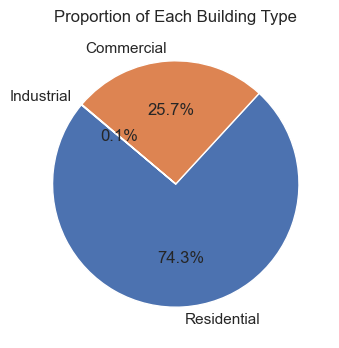

In [67]:
plt.figure(figsize=(4, 4))
plt.pie(building_type_counts, labels=building_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Building Type')
plt.show()


We see that we have major proportion for Residential Building type

In [68]:
df['BUILDING_SUBTYPE'].unique()

array(['Multi < 7', 'Multi 7+', 'Commercial', 'Single Family',
       'Municipal', 'Industrial', nan], dtype=object)

In [69]:
df['BUILDING_SUBTYPE'].value_counts()

Multi < 7        27284
Single Family    26366
Commercial        7775
Multi 7+          5225
Municipal          282
Industrial          42
Name: BUILDING_SUBTYPE, dtype: int64

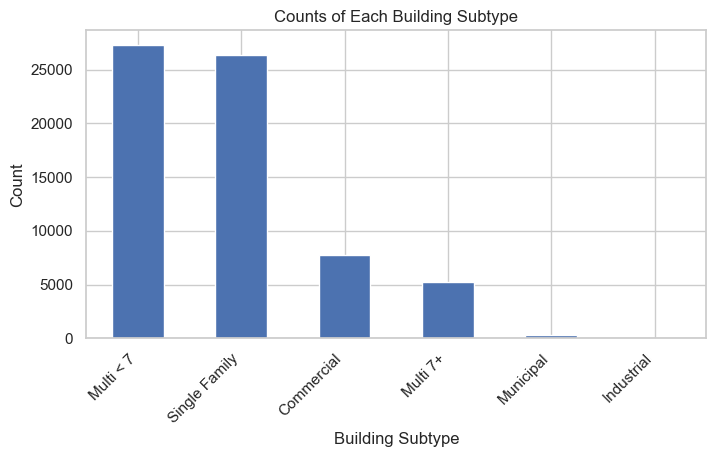

In [70]:
#plotting counts of each building subtypes.
plt.figure(figsize=(8, 4))
df['BUILDING_SUBTYPE'].value_counts().plot(kind='bar')
plt.title('Counts of Each Building Subtype')
plt.xlabel('Building Subtype')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [71]:
building_type_subtypes = df.groupby('BUILDING TYPE')['BUILDING_SUBTYPE'].value_counts()

for building_type in building_type_subtypes.index.levels[0]:
    sorted_subtypes = building_type_subtypes[building_type].sort_values
    print(f"{building_type}:\n{sorted_subtypes}\n")


Commercial:
<bound method Series.sort_values of BUILDING_SUBTYPE
Commercial       7775
Multi < 7        6731
Multi 7+         2396
Municipal         282
Single Family       1
Name: BUILDING_SUBTYPE, dtype: int64>

Industrial:
<bound method Series.sort_values of BUILDING_SUBTYPE
Industrial    42
Name: BUILDING_SUBTYPE, dtype: int64>

Residential:
<bound method Series.sort_values of BUILDING_SUBTYPE
Single Family    26365
Multi < 7        20553
Multi 7+          2829
Name: BUILDING_SUBTYPE, dtype: int64>



<Figure size 1400x800 with 0 Axes>

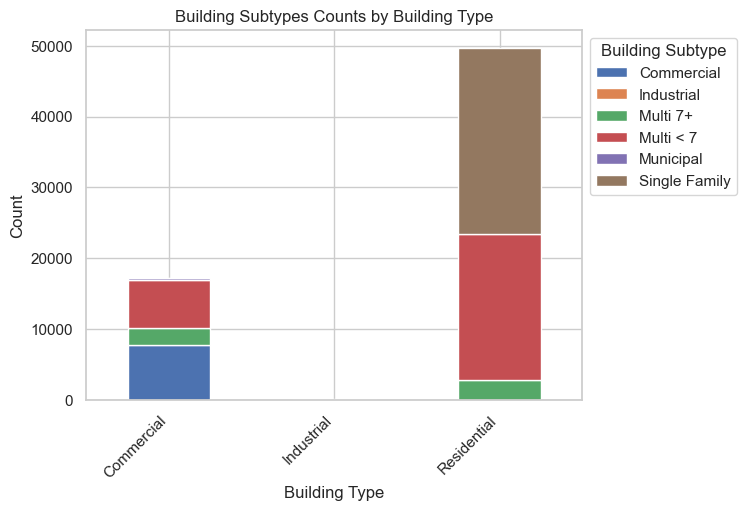

In [72]:
building_type_subtypes = df.groupby('BUILDING TYPE')['BUILDING_SUBTYPE'].value_counts().unstack()

plt.figure(figsize=(14, 8))
building_type_subtypes.plot(kind='bar', stacked=True)
plt.title('Building Subtypes Counts by Building Type')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Building Subtype', bbox_to_anchor=(1, 1))
plt.show()


In [73]:
df['GAS ACCOUNTS'].unique()

array(['11', nan, '4', 'Less than 4', '9', '5', '6', '7', '68', '8', '21',
       '15', '17', '22', '56', '14', '39', '237', '25', '12', '18', '13',
       '28', '10', '54', '31', '141', '30', '16', '86', '66', '111', '19',
       '40', '23', '27', '42', '41', '36', '35', '29', '20', '32', '47',
       '24', '34', '45', '44', '33', '37', '26', '38', '53', '72', '50',
       '57', '46', '55', '105', '67', '52', '79', '51', '48', '58', '121',
       '75', '49', '70', '73', '208', '84', '64', '82', '69', '147',
       '407', '131', '62', '109', '663', '81', '60', '61', '43', '80',
       '151', '207', '76', '115', '71', '85', '429', '63', '99', '259',
       '78', '74', '59', '127', '243', '144', '249', '65', '375', '129',
       '155', '322', '130', '241', '145', '226', '94', '95', '87', '83',
       '390', '158', '89', '184', '248', '199', '318', '120', '403',
       '133', '112', '101', '349', '266', '96', '77', '90', '415', '93',
       '108', '152', '117', '125', '124', '153', '122',

### Data Cleaning and Exploration :

Lets focus on residential single-family buildings

In [74]:
categories_to_remove = ['Industrial', 'Commercial']
categories_to_remove_Building_subtype= ['Multi < 7', 'Multi 7+', 'Industrial']
categories_to_remove_gas_electricity= ['Less than 4']
df_1 = df[~df['BUILDING TYPE'].isin(categories_to_remove)]

df_1 = df_1[~df_1['BUILDING_SUBTYPE'].isin(categories_to_remove_Building_subtype)]
df_1 = df_1[~df_1['ELECTRICITY ACCOUNTS'].isin(categories_to_remove_gas_electricity)]
df_1 = df_1[~df_1['GAS ACCOUNTS'].isin(categories_to_remove_gas_electricity)]
df_1

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
89,Hyde Park,1.703141e+14,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,...,267.0,151.0,1.00,0.00,1.96,136.0,0.9007,41.0,0.301,136.0
96,Lakeview,1.703106e+14,Residential,Single Family,16620.0,13420.0,8570.0,6124.0,5972.0,7081.0,...,69.0,58.0,1.00,0.00,1.30,53.0,0.9138,41.0,0.774,53.0
118,Logan Square,1.703183e+14,Residential,Single Family,NaN,NaN,NaN,NaN,NaN,NaN,...,36.0,18.0,1.00,119.00,2.00,18.0,1.0000,11.0,0.611,18.0
150,New City,1.703184e+14,Residential,Single Family,188.0,482.0,322.0,263.0,184.0,837.0,...,48.0,35.0,1.50,135.00,1.92,25.0,0.7143,22.0,0.880,25.0
152,North Center,1.703105e+14,Residential,Single Family,1602.0,1273.0,1186.0,1068.0,1496.0,2361.0,...,55.0,26.0,1.00,25.00,2.12,26.0,1.0000,11.0,0.423,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67020,Woodlawn,1.703183e+14,Residential,Single Family,9132.0,13078.0,10096.0,9667.0,10738.0,11824.0,...,59.0,25.0,2.05,106.29,2.81,21.0,0.8400,2.0,0.095,21.0
67024,Woodlawn,1.703183e+14,Residential,Single Family,2357.0,1439.0,1039.0,987.0,1522.0,1986.0,...,103.0,46.0,2.00,101.00,2.58,40.0,0.8695,26.0,0.650,40.0
67031,Woodlawn,1.703184e+14,Residential,Single Family,2905.0,2406.0,2034.0,2168.0,3186.0,4994.0,...,118.0,68.0,1.00,5.00,2.15,55.0,0.8088,33.0,0.600,55.0
67046,Woodlawn,1.703184e+14,Residential,Single Family,2705.0,1318.0,1582.0,1465.0,1494.0,2990.0,...,116.0,55.0,1.00,0.00,3.14,37.0,0.6727,26.0,0.703,37.0


### Checking for Null values in the data:

In [75]:
null_counts = df_1.isnull().sum()
null_counts

COMMUNITY AREA NAME                     0
CENSUS BLOCK                           77
BUILDING TYPE                          77
BUILDING_SUBTYPE                       77
KWH JANUARY 2010                       39
                                     ... 
OCCUPIED UNITS                          3
OCCUPIED UNITS PERCENTAGE             179
RENTER-OCCUPIED HOUSING UNITS           3
RENTER-OCCUPIED HOUSING PERCENTAGE    189
OCCUPIED HOUSING UNITS                  3
Length: 73, dtype: int64

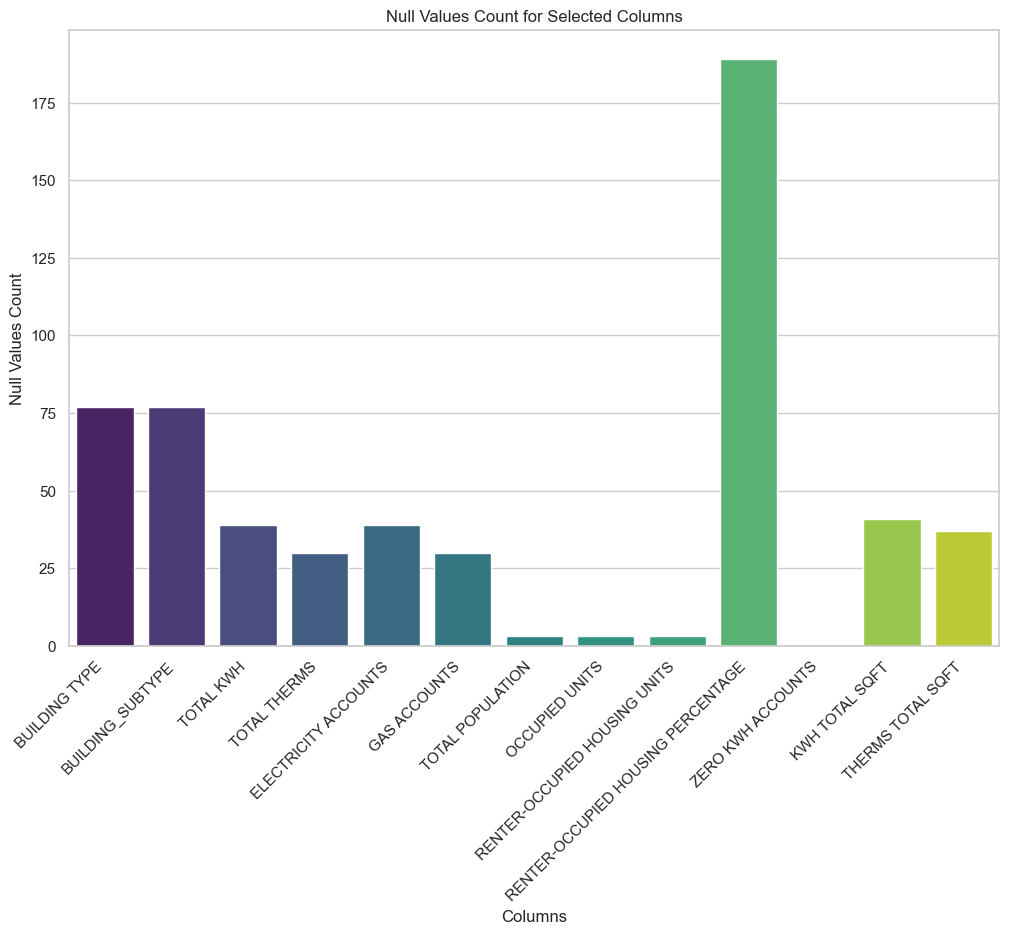

In [76]:

columns_to_remove_nulls = ['BUILDING TYPE', 'BUILDING_SUBTYPE', 'TOTAL KWH', 'TOTAL THERMS', 'ELECTRICITY ACCOUNTS', 'GAS ACCOUNTS',
                    'TOTAL POPULATION', 'OCCUPIED UNITS', 'RENTER-OCCUPIED HOUSING UNITS',
                    'RENTER-OCCUPIED HOUSING PERCENTAGE', 'ZERO KWH ACCOUNTS', 'KWH TOTAL SQFT', 'THERMS TOTAL SQFT']

null_counts = df_1[columns_to_remove_nulls].isnull().sum()

plt.figure(figsize=(12, 8))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')
plt.title('Null Values Count for Selected Columns')
plt.xlabel('Columns')
plt.ylabel('Null Values Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [77]:
df_1 = df_1.dropna(subset=columns_to_remove_nulls)
  
df_1

,COMMUNITY AREA NAME,CENSUS BLOCK,BUILDING TYPE,BUILDING_SUBTYPE,KWH JANUARY 2010,KWH FEBRUARY 2010,KWH MARCH 2010,KWH APRIL 2010,KWH MAY 2010,KWH JUNE 2010,...,TOTAL POPULATION,TOTAL UNITS,AVERAGE STORIES,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,OCCUPIED HOUSING UNITS
330,Lakeview,1.703106e+14,Residential,Single Family,1697.0,1663.0,1677.0,1497.0,2809.0,5307.0,...,43.0,20.0,1.00,0.00,2.15,20.0,1.0000,4.0,0.2000,20.0
348,Lincoln Square,1.703104e+14,Residential,Single Family,547.0,835.0,713.0,654.0,711.0,663.0,...,126.0,46.0,1.00,0.00,2.93,43.0,0.9348,29.0,0.6740,43.0
469,Albany Park,1.703114e+14,Residential,Single Family,4141.0,3798.0,2939.0,4727.0,5324.0,9676.0,...,132.0,64.0,1.17,14.33,2.20,60.0,0.9375,33.0,0.5500,60.0
479,Ashburn,1.703170e+14,Residential,Single Family,1237.0,2525.0,2811.0,1933.0,2704.0,4383.0,...,18.0,5.0,2.00,56.00,3.60,5.0,1.0000,0.0,0.0000,5.0
492,Austin,1.703125e+14,Residential,Single Family,770.0,961.0,1727.0,2207.0,2067.0,2139.0,...,28.0,13.0,1.00,54.00,2.33,12.0,0.9231,1.0,0.0830,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67008,Woodlawn,1.703183e+14,Residential,Single Family,3394.0,2583.0,2754.0,2443.0,3528.0,4633.0,...,140.0,54.0,1.43,52.29,2.86,49.0,0.9074,38.0,0.7759,49.0
67020,Woodlawn,1.703183e+14,Residential,Single Family,9132.0,13078.0,10096.0,9667.0,10738.0,11824.0,...,59.0,25.0,2.05,106.29,2.81,21.0,0.8400,2.0,0.0950,21.0
67024,Woodlawn,1.703183e+14,Residential,Single Family,2357.0,1439.0,1039.0,987.0,1522.0,1986.0,...,103.0,46.0,2.00,101.00,2.58,40.0,0.8695,26.0,0.6500,40.0
67031,Woodlawn,1.703184e+14,Residential,Single Family,2905.0,2406.0,2034.0,2168.0,3186.0,4994.0,...,118.0,68.0,1.00,5.00,2.15,55.0,0.8088,33.0,0.6000,55.0


In [78]:
null_matrix = df_1[columns_to_remove_nulls].isnull().sum()
null_matrix

BUILDING TYPE                         0
BUILDING_SUBTYPE                      0
TOTAL KWH                             0
TOTAL THERMS                          0
ELECTRICITY ACCOUNTS                  0
GAS ACCOUNTS                          0
TOTAL POPULATION                      0
OCCUPIED UNITS                        0
RENTER-OCCUPIED HOUSING UNITS         0
RENTER-OCCUPIED HOUSING PERCENTAGE    0
ZERO KWH ACCOUNTS                     0
KWH TOTAL SQFT                        0
THERMS TOTAL SQFT                     0
dtype: int64

#### Seasonal Variation in Energy Consumption: Total kWh Across Months

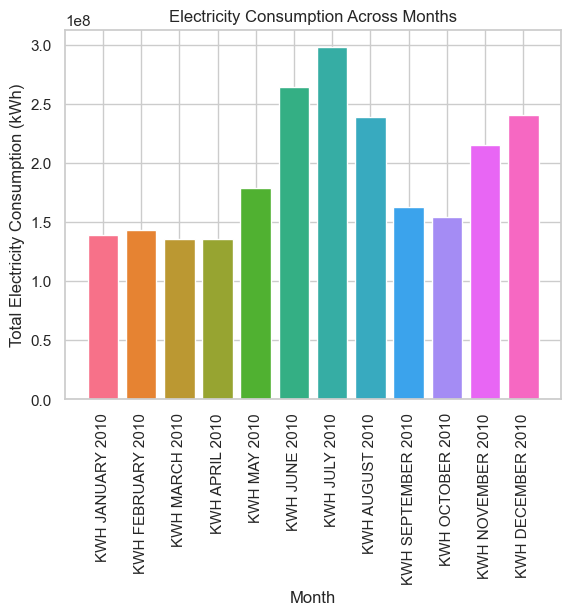

In [79]:
monthly_kwh_columns = ['KWH JANUARY 2010', 'KWH FEBRUARY 2010', 'KWH MARCH 2010', 'KWH APRIL 2010', 'KWH MAY 2010', 'KWH JUNE 2010', 'KWH JULY 2010', 'KWH AUGUST 2010', 'KWH SEPTEMBER 2010', 'KWH OCTOBER 2010', 'KWH NOVEMBER 2010', 'KWH DECEMBER 2010']

monthly_consumption = df_1[monthly_kwh_columns].sum()


sns.set(style="whitegrid")  
palette = sns.color_palette("husl", len(monthly_consumption))

plt.bar(monthly_consumption.index, monthly_consumption.values, color=palette)
plt.xlabel('Month')
plt.ylabel('Total Electricity Consumption (kWh)')
plt.title('Electricity Consumption Across Months')
plt.xticks(rotation=90)
plt.show()

The higher energy consumption in July and June can be attributed to summer temperatures, prompting increased usage of air conditioning and cooling systems. Similarly, heightened energy demand in December and November is influenced by the seasonal need for heating during colder months, coupled with additional usage for festive decorations and increased building occupancy during holiday celebrations.

#### Seasonal Variation in Gas Consumption: Total Therms Across Months

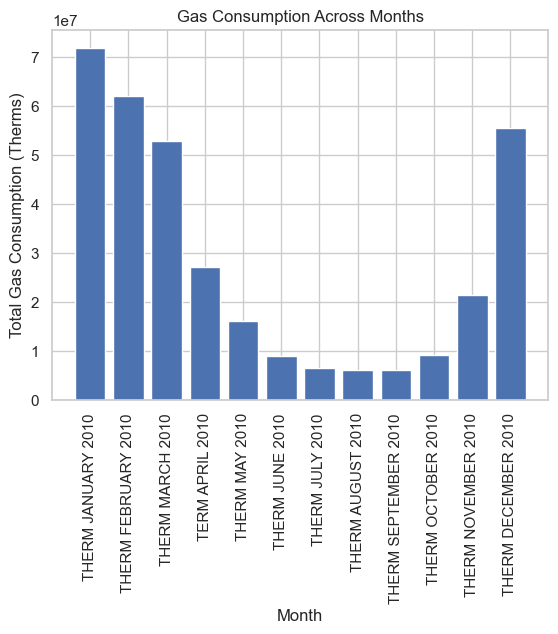

In [80]:
monthly_gas_columns = ['THERM JANUARY 2010', 'THERM FEBRUARY 2010', 'THERM MARCH 2010', 'TERM APRIL 2010', 'THERM MAY 2010', 'THERM JUNE 2010', 'THERM JULY 2010', 'THERM AUGUST 2010', 'THERM SEPTEMBER 2010', 'THERM OCTOBER 2010', 'THERM NOVEMBER 2010', 'THERM DECEMBER 2010']

monthly_gas_consumption = df_1[monthly_gas_columns].sum()

plt.bar(monthly_gas_consumption.index, monthly_gas_consumption.values)
plt.xlabel('Month')
plt.ylabel('Total Gas Consumption (Therms)')
plt.title('Gas Consumption Across Months')
plt.xticks(rotation=90)
plt.show()

During winter months (January to March) and especially in December, gas consumption peaks due to heightened heating needs driven by cold temperatures. Gas heating systems, such as gas furnaces, boilers, and water heaters, are prevalent for space heating and providing hot water.

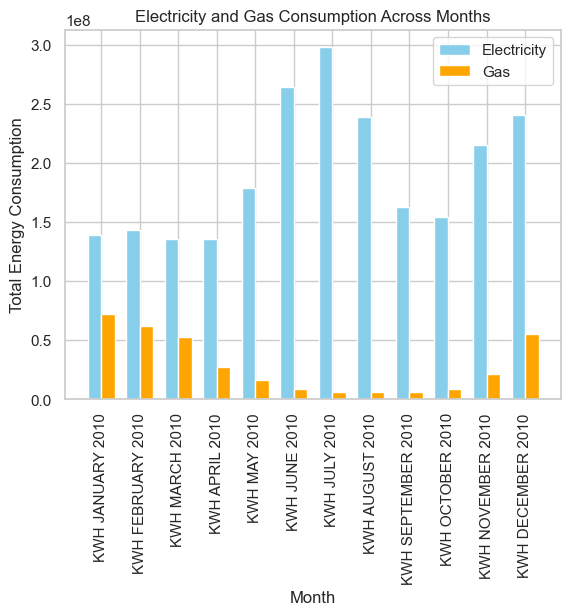

In [81]:
bar_width = 0.35
index = np.arange(len(monthly_consumption.index))

plt.bar(index, monthly_consumption.values, width=bar_width, color='skyblue', label='Electricity')
plt.bar(index + bar_width, monthly_gas_consumption.values, width=bar_width, color='orange', label='Gas')
plt.xlabel('Month')
plt.ylabel('Total Energy Consumption')
plt.title('Electricity and Gas Consumption Across Months')
plt.xticks(index + bar_width / 2, monthly_consumption.index, rotation=90)
plt.legend()
plt.show()

#### Top 10 Community Areas with Highest Total kWh Consumption

In [82]:
df_1["COMMUNITY AREA NAME"].value_counts()

Roseland           758
Austin             743
Norwood Park       706
Belmont Cragin     688
Dunning            687
                  ... 
Douglas             32
Washington Park     27
Oakland             17
Riverdale           17
Near South Side     17
Name: COMMUNITY AREA NAME, Length: 76, dtype: int64

In [83]:
df_1.dtypes

COMMUNITY AREA NAME                    object
CENSUS BLOCK                          float64
BUILDING TYPE                          object
BUILDING_SUBTYPE                       object
KWH JANUARY 2010                      float64
                                       ...   
OCCUPIED UNITS                        float64
OCCUPIED UNITS PERCENTAGE             float64
RENTER-OCCUPIED HOUSING UNITS         float64
RENTER-OCCUPIED HOUSING PERCENTAGE    float64
OCCUPIED HOUSING UNITS                float64
Length: 73, dtype: object

In [84]:
# top 10 community areas with the highest total kWh
top_10_areas = df_1.groupby('COMMUNITY AREA NAME')['TOTAL KWH'].mean().nlargest(10) # removed sum and kept mean

print("Top 10 Community Areas with Highest Total kWh:")
print(top_10_areas)

Top 10 Community Areas with Highest Total kWh:
COMMUNITY AREA NAME
Near South Side    390203.352941
Mount Greenwood    187744.856655
Near North Side    185601.420000
O'Hare             184444.968750
Kenwood            155475.018182
Beverly            154517.540201
Forest Glen        152458.350543
Ashburn            143448.007463
Morgan Park        137998.072500
Hyde Park          134587.277778
Name: TOTAL KWH, dtype: float64


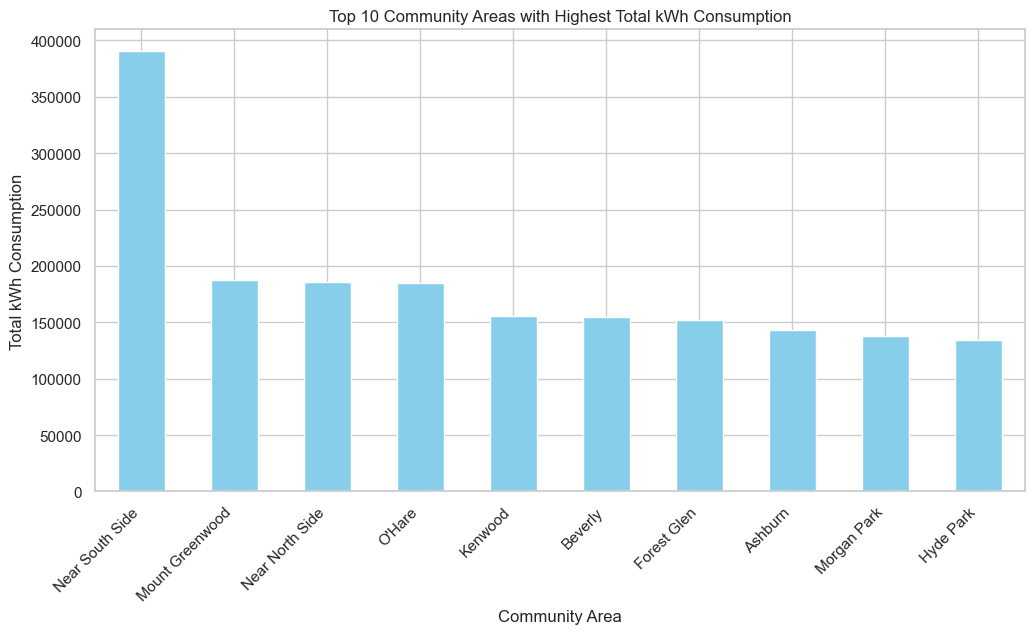

In [85]:
# Plotting the top 10 community areas with the highest mean total kWh
plt.figure(figsize=(12, 6))
top_10_areas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Community Areas with Highest Total kWh Consumption')
plt.xlabel('Community Area')
plt.ylabel('Total kWh Consumption')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Energy consumption patterns between 'ELECTRICITY ACCOUNTS' and 'GAS ACCOUNTS'

       ELECTRICITY ACCOUNTS GAS ACCOUNTS
count                 22130        22130
unique                   88           92
top                       5            6
freq                   1511         1574


C:\Users\reddy\AppData\Local\Temp\ipykernel_17404\3215182657.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1[energy_columns] = df_1[energy_columns].apply(pd.to_numeric, errors='coerce')


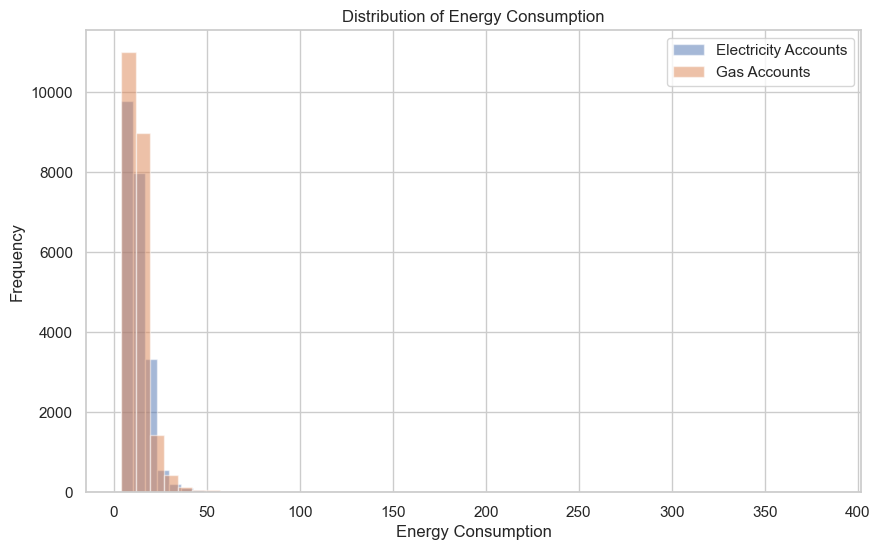

In [86]:
energy_columns = ['ELECTRICITY ACCOUNTS', 'GAS ACCOUNTS']

# Descriptive Statistics
energy_stats = df_1[energy_columns].describe()
print(energy_stats)
df_1[energy_columns] = df_1[energy_columns].apply(pd.to_numeric, errors='coerce')

# Distribution Comparison
plt.figure(figsize=(10, 6))
plt.hist(df_1['ELECTRICITY ACCOUNTS'], bins=50, alpha=0.5, label='Electricity Accounts')
plt.hist(df_1['GAS ACCOUNTS'], bins=50, alpha=0.5, label='Gas Accounts')
plt.title('Distribution of Energy Consumption')
plt.xlabel('Energy Consumption')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [87]:
#creating a new dataframe df2 with required columns
df_2= df_1[['TOTAL KWH', 'TOTAL THERMS', 'ELECTRICITY ACCOUNTS', 'GAS ACCOUNTS',  'TOTAL POPULATION','AVERAGE STORIES',
       'AVERAGE BUILDING AGE',  'THERMS TOTAL SQFT', 'TOTAL UNITS','ZERO KWH ACCOUNTS', 'OCCUPIED UNITS','OCCUPIED UNITS PERCENTAGE','AVERAGE HOUSESIZE','RENTER-OCCUPIED HOUSING UNITS'
       ,'RENTER-OCCUPIED HOUSING PERCENTAGE',  'KWH TOTAL SQFT',
       ]]

df_2['GAS ACCOUNTS'] = df_2['GAS ACCOUNTS'].astype(int)
df_2['ELECTRICITY ACCOUNTS'] = df_2['ELECTRICITY ACCOUNTS'].astype(int)

C:\Users\reddy\AppData\Local\Temp\ipykernel_17404\4136411457.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['GAS ACCOUNTS'] = df_2['GAS ACCOUNTS'].astype(int)
C:\Users\reddy\AppData\Local\Temp\ipykernel_17404\4136411457.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['ELECTRICITY ACCOUNTS'] = df_2['ELECTRICITY ACCOUNTS'].astype(int)


In [88]:
df_2.head()

,TOTAL KWH,TOTAL THERMS,ELECTRICITY ACCOUNTS,GAS ACCOUNTS,TOTAL POPULATION,AVERAGE STORIES,AVERAGE BUILDING AGE,THERMS TOTAL SQFT,TOTAL UNITS,ZERO KWH ACCOUNTS,OCCUPIED UNITS,OCCUPIED UNITS PERCENTAGE,AVERAGE HOUSESIZE,RENTER-OCCUPIED HOUSING UNITS,RENTER-OCCUPIED HOUSING PERCENTAGE,KWH TOTAL SQFT
330,31686.0,3634.0,5,4,43.0,1.00,0.00,2387.0,20.0,3,20.0,1.0000,2.15,4.0,0.200,2387.0
348,11874.0,4762.0,4,7,126.0,1.00,0.00,4011.0,46.0,3,43.0,0.9348,2.93,29.0,0.674,4011.0
469,61020.0,6065.0,6,6,132.0,1.17,14.33,9472.0,64.0,2,60.0,0.9375,2.20,33.0,0.550,9472.0
479,35585.0,5843.0,5,4,18.0,2.00,56.00,3960.0,5.0,0,5.0,1.0000,3.60,0.0,0.000,4950.0
492,30572.0,7498.0,5,7,28.0,1.00,54.00,6354.0,13.0,2,12.0,0.9231,2.33,1.0,0.083,4495.0


#### Checking for Outliers

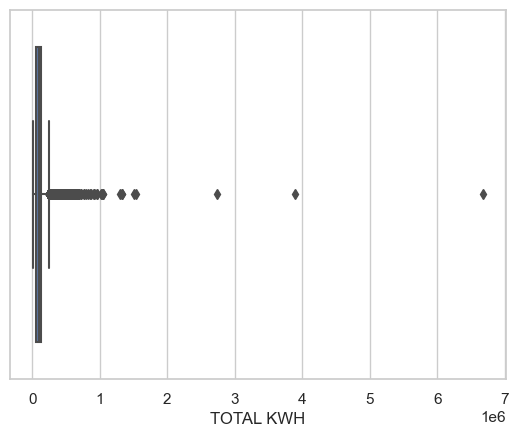

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.boxplot(x=df_2['TOTAL KWH'])

plt.show()

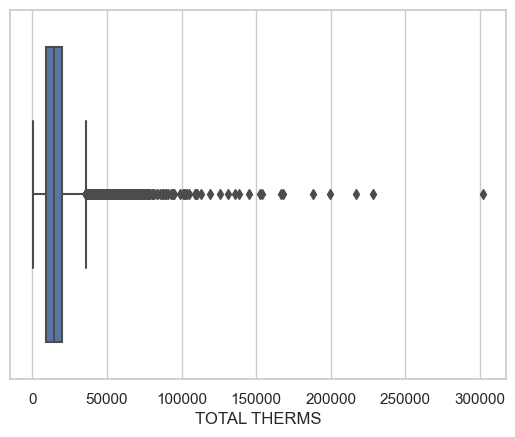

In [90]:
sns.boxplot(x=df_2['TOTAL THERMS'])

plt.show()

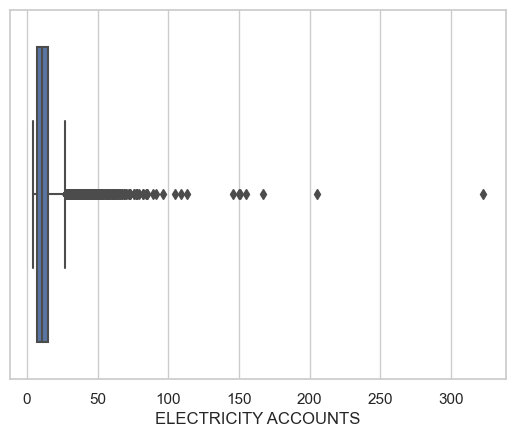

In [91]:

sns.boxplot(x=df_2['ELECTRICITY ACCOUNTS'])

plt.show()

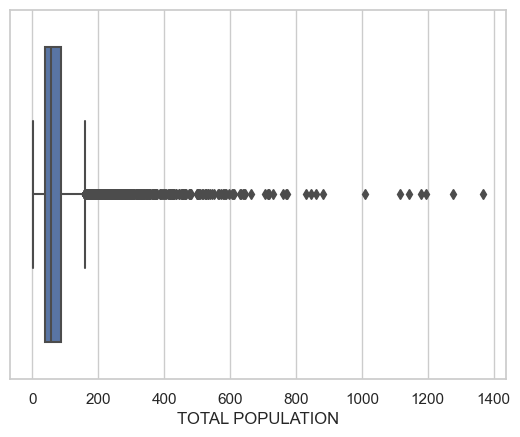

In [92]:

sns.boxplot(x=df_2['TOTAL POPULATION'])

plt.show()

#### Removing Outliers

In [93]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5
    return column[(column >= Q1 - threshold * IQR) & (column <= Q3 + threshold * IQR)]

df_2 = df_2.apply(remove_outliers)

print(df_2)

null_counts = df_2.isnull().sum()

print("Number of null values in each column:")
print(null_counts)


       TOTAL KWH  TOTAL THERMS  ELECTRICITY ACCOUNTS  GAS ACCOUNTS  \
330      31686.0        3634.0                   5.0           4.0   
348      11874.0        4762.0                   4.0           7.0   
469      61020.0        6065.0                   6.0           6.0   
479      35585.0        5843.0                   5.0           4.0   
492      30572.0        7498.0                   5.0           7.0   
...          ...           ...                   ...           ...   
67008    45349.0        4381.0                   9.0           6.0   
67020   168900.0       31531.0                  21.0          20.0   
67024    27043.0        6167.0                   6.0           5.0   
67031    37604.0        3883.0                   7.0           5.0   
67046    27654.0       10769.0                   6.0           9.0   

       TOTAL POPULATION  AVERAGE STORIES  AVERAGE BUILDING AGE  \
330                43.0             1.00                   NaN   
348               126.0    

In [94]:
#Replacing null values with mean
def replace_null_with_mean(column):
    column_mean = column.mean()
    return column.fillna(column_mean)

df_2 = df_2.apply(replace_null_with_mean)

print(df_2)

null_counts = df_2.isnull().sum()

print("Number of null values in each column:")
print(null_counts)

       TOTAL KWH  TOTAL THERMS  ELECTRICITY ACCOUNTS  GAS ACCOUNTS  \
330      31686.0        3634.0                   5.0           4.0   
348      11874.0        4762.0                   4.0           7.0   
469      61020.0        6065.0                   6.0           6.0   
479      35585.0        5843.0                   5.0           4.0   
492      30572.0        7498.0                   5.0           7.0   
...          ...           ...                   ...           ...   
67008    45349.0        4381.0                   9.0           6.0   
67020   168900.0       31531.0                  21.0          20.0   
67024    27043.0        6167.0                   6.0           5.0   
67031    37604.0        3883.0                   7.0           5.0   
67046    27654.0       10769.0                   6.0           9.0   

       TOTAL POPULATION  AVERAGE STORIES  AVERAGE BUILDING AGE  \
330                43.0             1.00             74.732489   
348               126.0    

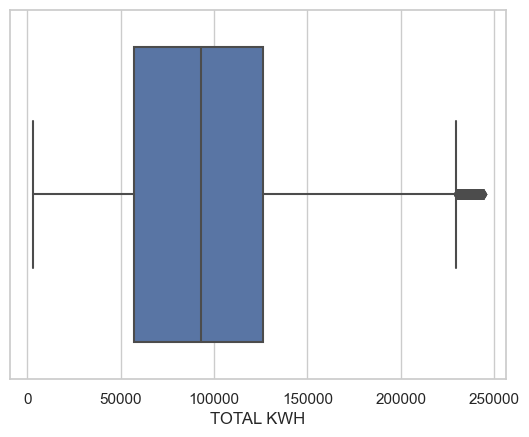

In [95]:
sns.boxplot(x=df_2['TOTAL KWH'])

plt.show()

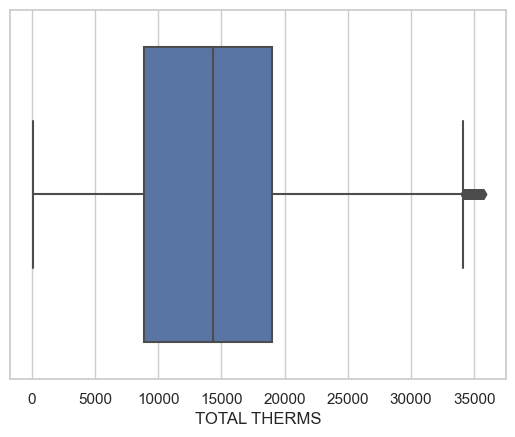

In [96]:
sns.boxplot(x=df_2['TOTAL THERMS'])

plt.show()

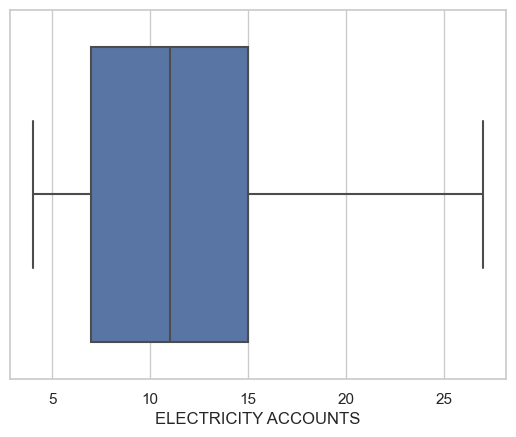

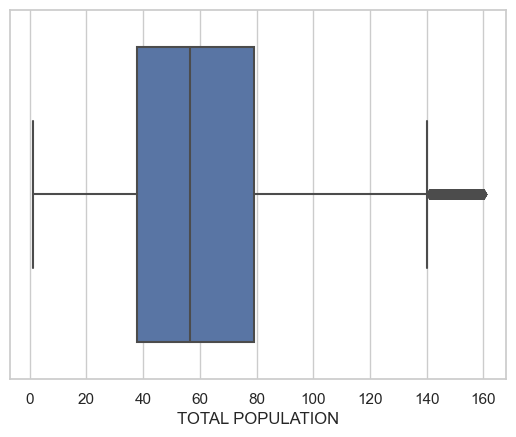

In [97]:

sns.boxplot(x=df_2['ELECTRICITY ACCOUNTS'])

plt.show()


sns.boxplot(x=df_2['TOTAL POPULATION'])

plt.show()

In [98]:
#performing Standardization to bring all data features to a common scale

from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

X_scaled = scaler.fit_transform(df_2)

df_2 = pd.DataFrame(X_scaled, columns=df_2.columns)

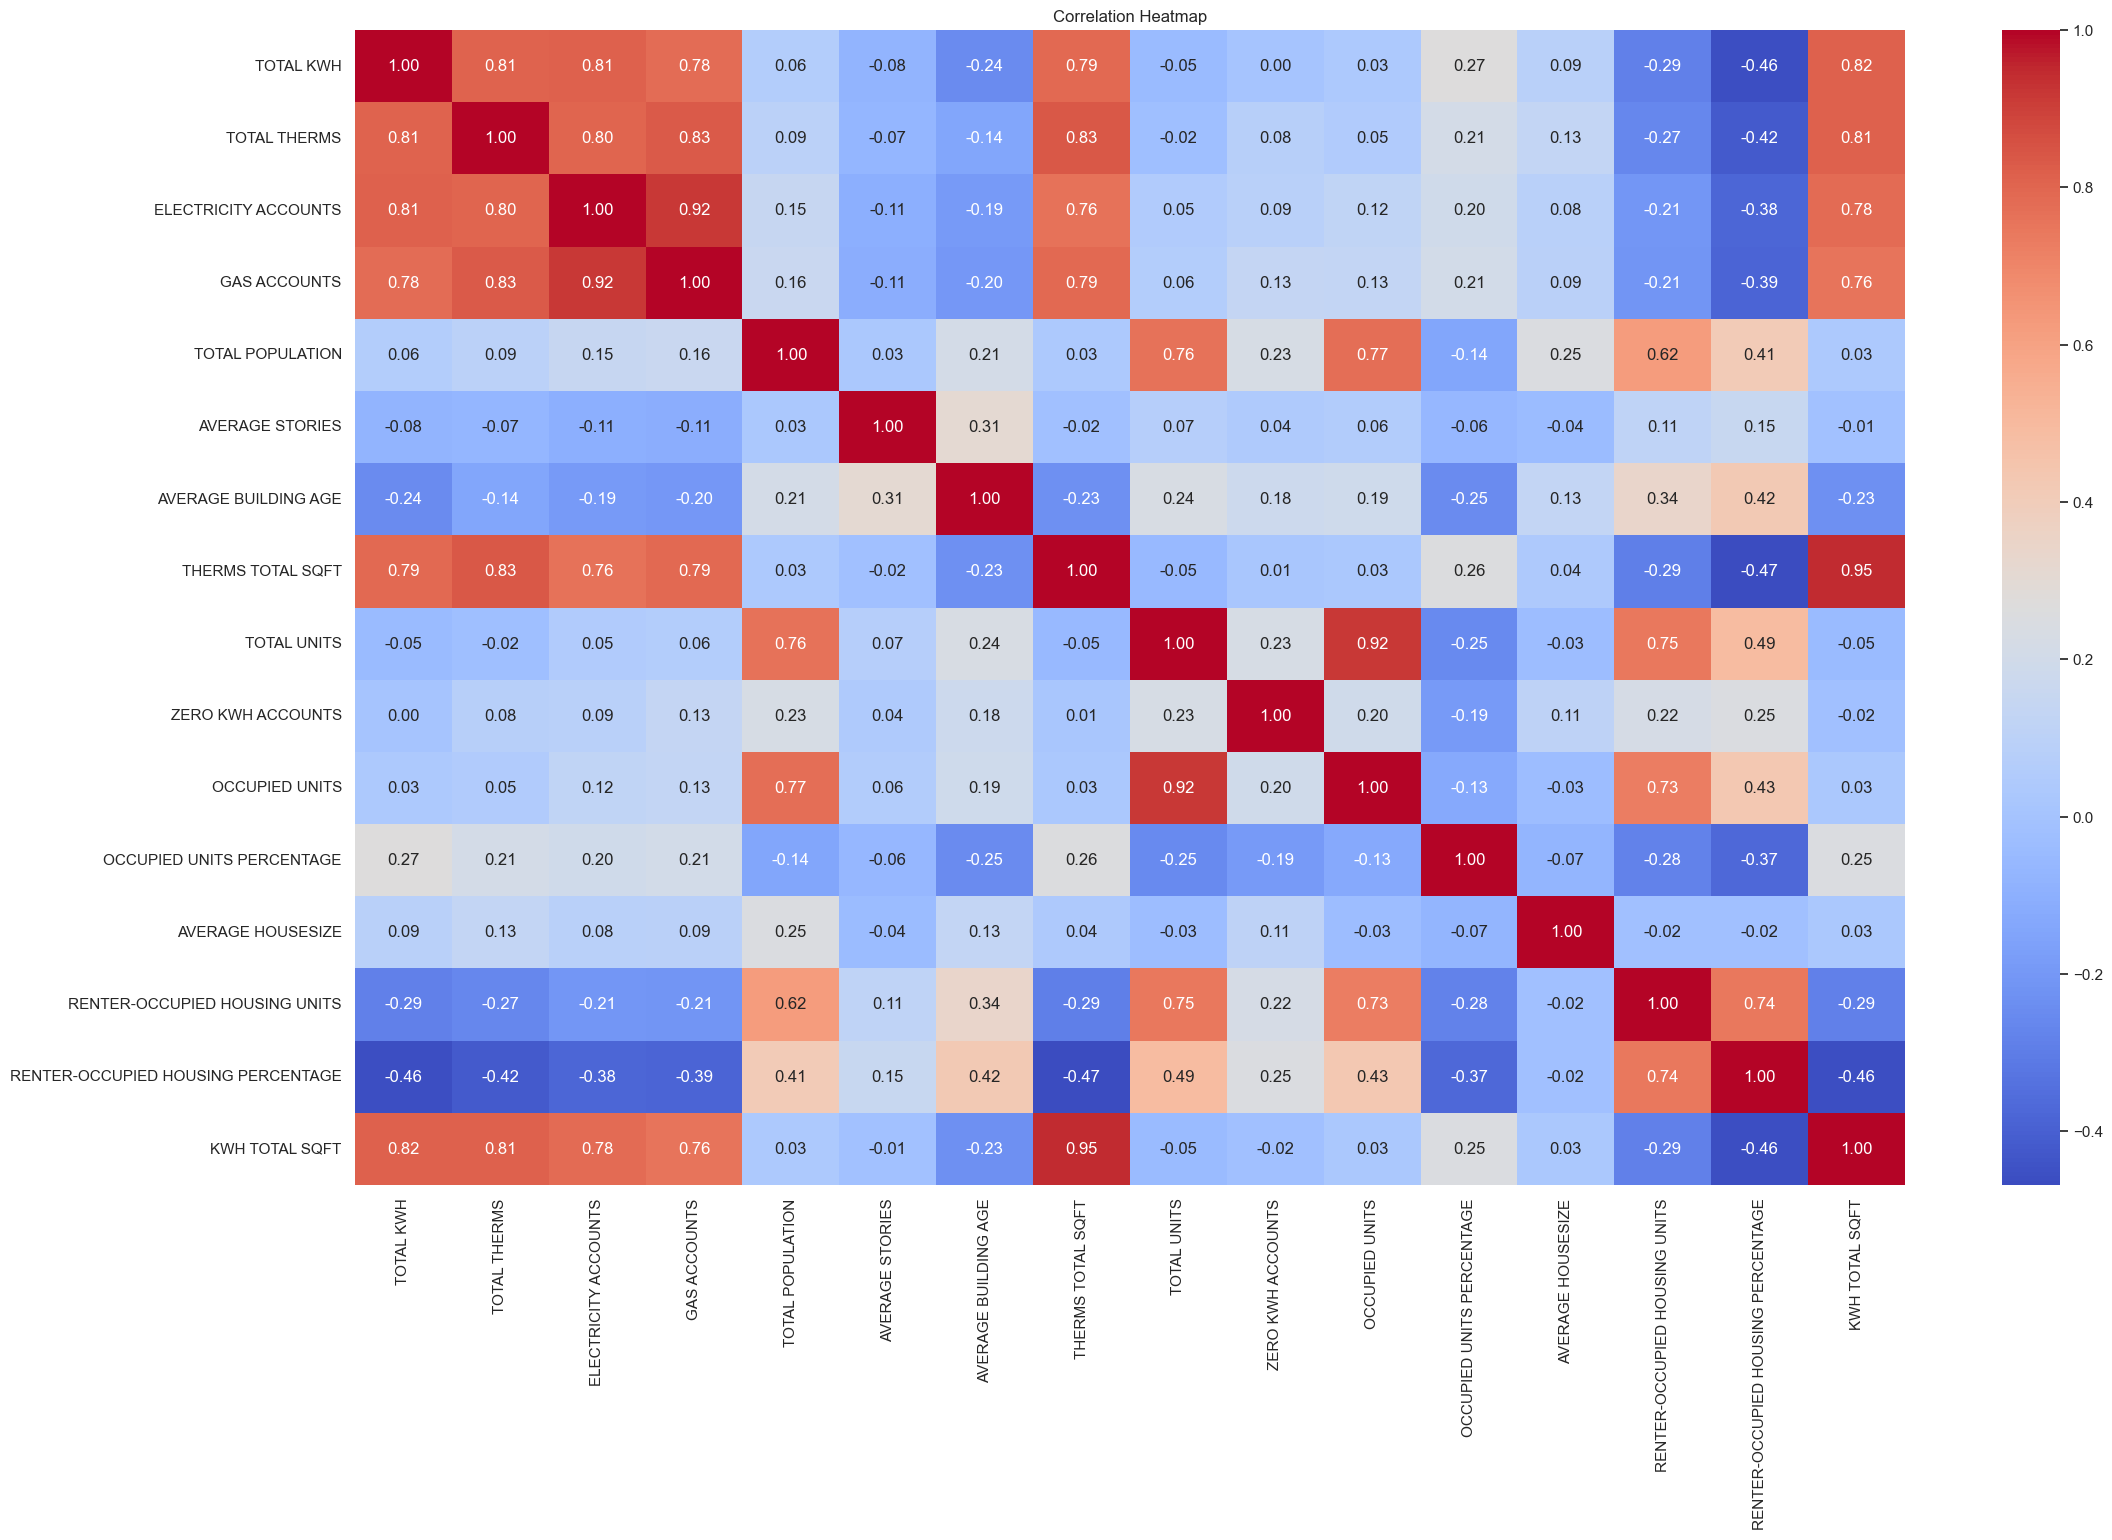

In [99]:
correlation_matrix = df_2.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [100]:
correlation_with_kwh = correlation_matrix['TOTAL KWH'].drop('TOTAL THERMS')
top_12_kwh = correlation_with_kwh.abs().sort_values(ascending=False).head(12)

correlation_with_therms = correlation_matrix['TOTAL THERMS'].drop('TOTAL KWH')
top_12_therms = correlation_with_therms.abs().sort_values(ascending=False).head(12)

print('Top 12 most correlated features for TOTAL KWH:\n', top_12_kwh)
print('Top 12 most correlated features for TOTAL THERMS:\n', top_12_therms)


Top 12 most correlated features for TOTAL KWH:
 TOTAL KWH                             1.000000
KWH TOTAL SQFT                        0.815142
ELECTRICITY ACCOUNTS                  0.811093
THERMS TOTAL SQFT                     0.793491
GAS ACCOUNTS                          0.780279
RENTER-OCCUPIED HOUSING PERCENTAGE    0.459071
RENTER-OCCUPIED HOUSING UNITS         0.290048
OCCUPIED UNITS PERCENTAGE             0.271560
AVERAGE BUILDING AGE                  0.244776
AVERAGE HOUSESIZE                     0.086371
AVERAGE STORIES                       0.082825
TOTAL POPULATION                      0.064849
Name: TOTAL KWH, dtype: float64
Top 12 most correlated features for TOTAL THERMS:
 TOTAL THERMS                          1.000000
THERMS TOTAL SQFT                     0.834830
GAS ACCOUNTS                          0.828313
KWH TOTAL SQFT                        0.811081
ELECTRICITY ACCOUNTS                  0.800742
RENTER-OCCUPIED HOUSING PERCENTAGE    0.420467
RENTER-OCCUPIED HOUSING

From the above correlation results, there are many common columns between 'TOTAL KWH' and 'TOTAL THERMS'. Preparing a Dataframe based on above results 

In [101]:
df_3= df_2[['TOTAL KWH', 'TOTAL THERMS', 'KWH TOTAL SQFT', 'ELECTRICITY ACCOUNTS',
       'THERMS TOTAL SQFT', 'GAS ACCOUNTS',
       'RENTER-OCCUPIED HOUSING PERCENTAGE', 'RENTER-OCCUPIED HOUSING UNITS',
       'OCCUPIED UNITS PERCENTAGE', 'AVERAGE BUILDING AGE',
       'AVERAGE HOUSESIZE', 'AVERAGE STORIES', 'TOTAL POPULATION', 'ZERO KWH ACCOUNTS']]

### MultiCollinearity

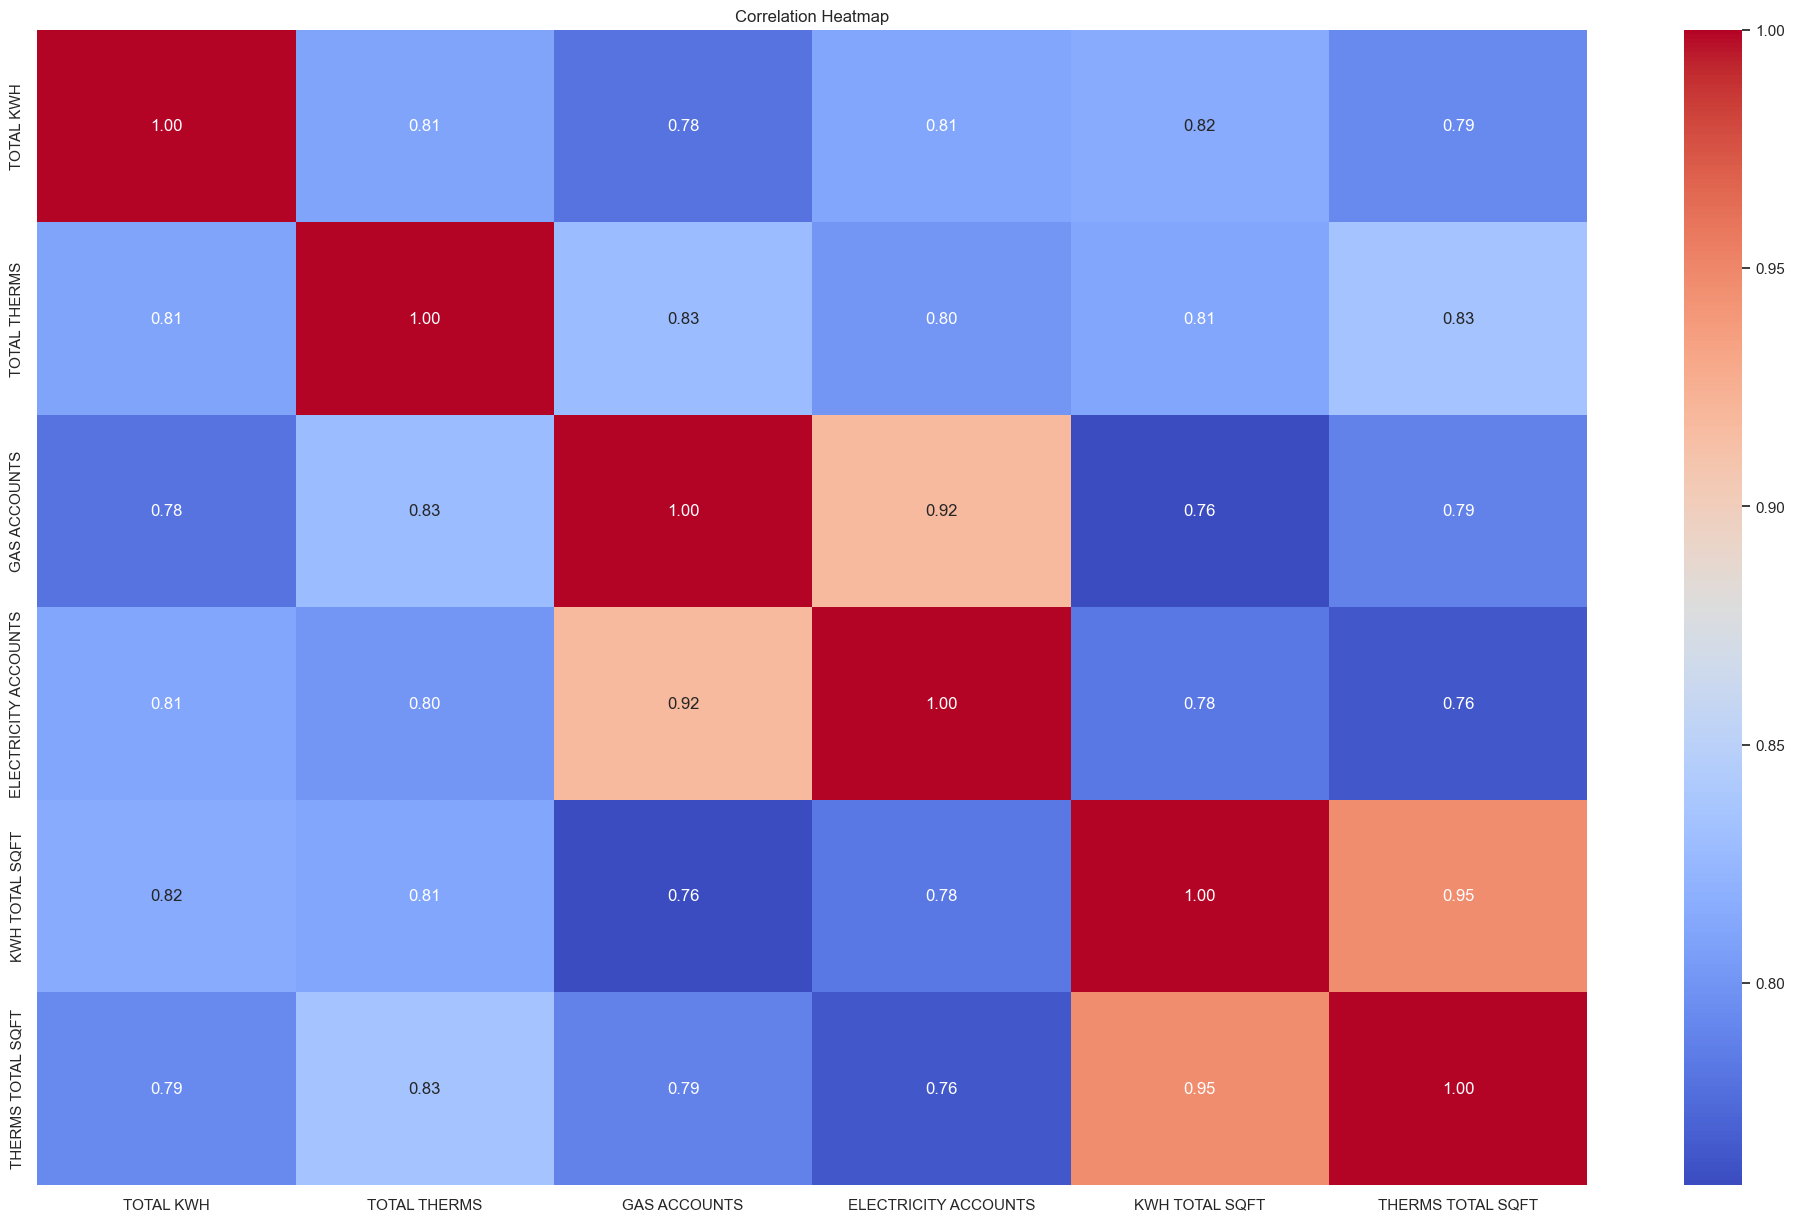

In [102]:
df_4= df_2[['TOTAL KWH', 'TOTAL THERMS', 'GAS ACCOUNTS', 'ELECTRICITY ACCOUNTS', 'KWH TOTAL SQFT', 'THERMS TOTAL SQFT']]
correlation_matrix = df_4.corr()
plt.figure(figsize=(25, 15)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

'ELECTRICITY ACCOUNTS' and 'GAS ACCOUNTS' have a strong correlation (correlation of 0.92) and correlate well with our target variables, 'TOTAL KWH' (0.78 and 0.81, respectively) and 'TOTAL THERMS' (0.83 and 0.80, respectively), taking into account the significant correlations observed among the variables in our dataset. Because of their multicollinearity, it may be difficult to determine with precision how each of these factors affects the target variables.

Likewise, there is a strong correlation between 'KWH TOTAL SQFT' and 'THERMS TOTAL SQFT' (0.95) as well as between 'TOTAL KWH' (0.81 and 0.80, respectively) and 'TOTAL THERMS' (0.78 and 0.83, respectively).

After considering the above factors we decided to remove 'GAS ACCOUNTS' and 'THERMS TOTAL SQFT' to avoid Multicollinearity.

In [103]:
df_3= df_3.drop(columns=['GAS ACCOUNTS', 'THERMS TOTAL SQFT'])

In [106]:
df_3.head(5)

,TOTAL KWH,TOTAL THERMS,KWH TOTAL SQFT,ELECTRICITY ACCOUNTS,RENTER-OCCUPIED HOUSING PERCENTAGE,RENTER-OCCUPIED HOUSING UNITS,OCCUPIED UNITS PERCENTAGE,AVERAGE BUILDING AGE,AVERAGE HOUSESIZE,AVERAGE STORIES,TOTAL POPULATION,ZERO KWH ACCOUNTS
0,-1.350194,-1.594122,-1.727639,-1.312834,-0.512470,-0.442981,1.010147,6.658385e-16,-1.164122,-1.066194,-0.578926,0.702977
1,-1.772009,-1.428631,-1.465035,-1.513192,1.292529,2.779787,0.154395,6.658385e-16,-0.095049,-1.066194,2.020143,0.702977
2,-0.725648,-1.237464,-0.581982,-1.112475,0.820335,3.295430,0.189832,-2.830111e+00,-1.095591,-0.523616,2.208028,0.127417
3,-1.267181,-1.270034,-1.313197,-1.312834,-1.274073,-0.958624,1.010147,-8.776961e-01,0.823256,2.125439,-1.361779,-1.023701
4,-1.373912,-1.027225,-1.386772,-1.312834,-0.958008,-0.829713,0.000832,-9.714046e-01,-0.917413,-1.066194,-1.048638,0.127417


### Data Splitting for Training and Testing

We are dividing our dataset into training (75%) and testing (25%) sets in this step. The two target variables in question, "TOTAL KWH" and "TOTAL THERMS," each include ten attributes. 

In [107]:
X = df_3.drop(['TOTAL KWH', 'TOTAL THERMS'], axis=1)
y = df_3[['TOTAL KWH', 'TOTAL THERMS']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Linear Regression

We started the machine learning part of our group project using linear regression because our characteristics and target variables are continuous. We chose linear regression because it is easily interpreted and provides a solid basis for understanding relationships between variables. 

In [113]:
base_regressor = LinearRegression()

multioutput_regressor_lr = MultiOutputRegressor(base_regressor)

multioutput_regressor_lr.fit(X_train, y_train)

y_test_pred_lr = multioutput_regressor_lr.predict(X_test)
y_train_pred_lr = multioutput_regressor_lr.predict(X_train)

#KWH
r2_train_kwh_lr = r2_score(y_train['TOTAL KWH'], y_train_pred_lr[:, 0])
mae_train_kwh_lr = mean_absolute_error(y_train['TOTAL KWH'], y_train_pred_lr[:, 0])
mse_train_kwh_lr = mean_squared_error(y_train['TOTAL KWH'], y_train_pred_lr[:, 0])

r2_test_kwh_lr = r2_score(y_test['TOTAL KWH'], y_test_pred_lr[:, 0])
mae_test_kwh_lr = mean_absolute_error(y_test['TOTAL KWH'], y_test_pred_lr[:, 0])
mse_test_kwh_lr = mean_squared_error(y_test['TOTAL KWH'], y_test_pred_lr[:, 0])

#THERMS
r2_train_therms_lr = r2_score(y_train['TOTAL THERMS'], y_train_pred_lr[:, 1])
mae_train_therms_lr = mean_absolute_error(y_train['TOTAL THERMS'], y_train_pred_lr[:, 1])
mse_train_therms_lr = mean_squared_error(y_train['TOTAL THERMS'], y_train_pred_lr[:, 1])

r2_test_therms_lr = r2_score(y_test['TOTAL THERMS'], y_test_pred_lr[:, 1])
mae_test_therms_lr = mean_absolute_error(y_test['TOTAL THERMS'], y_test_pred_lr[:, 1])
mse_test_therms_lr = mean_squared_error(y_test['TOTAL THERMS'], y_test_pred_lr[:, 1])

results_lr = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'KWH Train Set': [r2_train_kwh_lr, mae_train_kwh_lr, mse_train_kwh_lr], 
    'THERMS Train Set':[r2_train_therms_lr, mae_train_therms_lr, mse_train_therms_lr],
    'KWH Test Set': [r2_test_kwh_lr, mae_test_kwh_lr, mse_test_kwh_lr], 
    'THERMS Test Set': [r2_test_therms_lr, mae_test_therms_lr, mse_test_therms_lr],
    'Mean Train Set':[np.mean([r2_train_kwh_lr,r2_train_therms_lr]), np.mean([mae_train_kwh_lr,mae_train_therms_lr]), np.mean([mse_train_kwh_lr,mse_train_therms_lr])],
    'Mean Test Set': [np.mean([r2_test_kwh_lr,r2_test_therms_lr]), np.mean([mae_test_kwh_lr,mae_test_therms_lr]), np.mean([mse_test_kwh_lr,mse_test_therms_lr])]
})

results_lr = results_lr.round(4)
results_lr

,Metric,KWH Train Set,THERMS Train Set,KWH Test Set,THERMS Test Set,Mean Train Set,Mean Test Set
0,R-squared,0.7513,0.7475,0.7631,0.7430,0.7494,0.7531
1,MAE,0.3473,0.3480,0.3413,0.3483,0.3477,0.3448
2,MSE,0.2492,0.2540,0.2353,0.2524,0.2516,0.2439


The linear regression model demonstrates good predictive ability for both target variables low MAE and MSE values indicate precise predictions, while R-squared values indicate a sizable amount of variance explained. The metrics that are consistent between the training and test sets show how effectively the model generalizes to new data.

### Polynomial Regression

In [114]:
degree = 3
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

multioutput_regressor_pr = MultiOutputRegressor(polyreg)

multioutput_regressor_pr.fit(X_train, y_train)

y_test_pred_pr = multioutput_regressor_pr.predict(X_test)
y_train_pred_pr = multioutput_regressor_pr.predict(X_train)

#KWH
r2_train_kwh_pr = r2_score(y_train['TOTAL KWH'], y_train_pred_pr[:, 0])
mae_train_kwh_pr = mean_absolute_error(y_train['TOTAL KWH'], y_train_pred_pr[:, 0])
mse_train_kwh_pr = mean_squared_error(y_train['TOTAL KWH'], y_train_pred_pr[:, 0])

r2_test_kwh_pr = r2_score(y_test['TOTAL KWH'], y_test_pred_pr[:, 0])
mae_test_kwh_pr = mean_absolute_error(y_test['TOTAL KWH'], y_test_pred_pr[:, 0])
mse_test_kwh_pr = mean_squared_error(y_test['TOTAL KWH'], y_test_pred_pr[:, 0])

#THERMS
r2_train_therms_pr = r2_score(y_train['TOTAL THERMS'], y_train_pred_pr[:, 1])
mae_train_therms_pr = mean_absolute_error(y_train['TOTAL THERMS'], y_train_pred_pr[:, 1])
mse_train_therms_pr = mean_squared_error(y_train['TOTAL THERMS'], y_train_pred_pr[:, 1])

r2_test_therms_pr = r2_score(y_test['TOTAL THERMS'], y_test_pred_pr[:, 1])
mae_test_therms_pr = mean_absolute_error(y_test['TOTAL THERMS'], y_test_pred_pr[:, 1])
mse_test_therms_pr = mean_squared_error(y_test['TOTAL THERMS'], y_test_pred_pr[:, 1])

results_pr = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'KWH Train Set': [r2_train_kwh_pr, mae_train_kwh_pr, mse_train_kwh_pr], 
    'THERMS Train Set':[r2_train_therms_pr, mae_train_therms_pr, mse_train_therms_pr],
    'KWH Test Set': [r2_test_kwh_pr, mae_test_kwh_pr, mse_test_kwh_pr], 
    'THERMS Test Set': [r2_test_therms_pr, mae_test_therms_pr, mse_test_therms_pr],
    'Mean Train Set':[np.mean([r2_train_kwh_pr,r2_train_therms_pr]), np.mean([mae_train_kwh_pr,mae_train_therms_pr]), np.mean([mse_train_kwh_pr,mse_train_therms_pr])],
    'Mean Test Set': [np.mean([r2_test_kwh_pr,r2_test_therms_pr]), np.mean([mae_test_kwh_pr,mae_test_therms_pr]), np.mean([mse_test_kwh_pr,mse_test_therms_pr])]
})

results_pr= results_pr.round(4)
results_pr

,Metric,KWH Train Set,THERMS Train Set,KWH Test Set,THERMS Test Set,Mean Train Set,Mean Test Set
0,R-squared,0.7735,0.7788,0.7731,0.7667,0.7762,0.7699
1,MAE,0.3347,0.3270,0.3350,0.3300,0.3308,0.3325
2,MSE,0.2269,0.2225,0.2254,0.2291,0.2247,0.2273


Compared to the Linear Regressor, the Polynomial Regressor with Degree=3 performs better, showing lower MAE and MSE values for both training and test sets, as well as higher R-squared scores (0.0168 difference). This suggests that the underlying patterns in "TOTAL KWH" and "TOTAL THERMS" are more accurately represented by the polynomial model.

### Ensemble Learning

In the process of increasing the Model Performance and Robustness, we have decided to implement Ensemble Learning by leveraging feature_importances_ from the Decision Tree Regressor.

#### Feature Importance

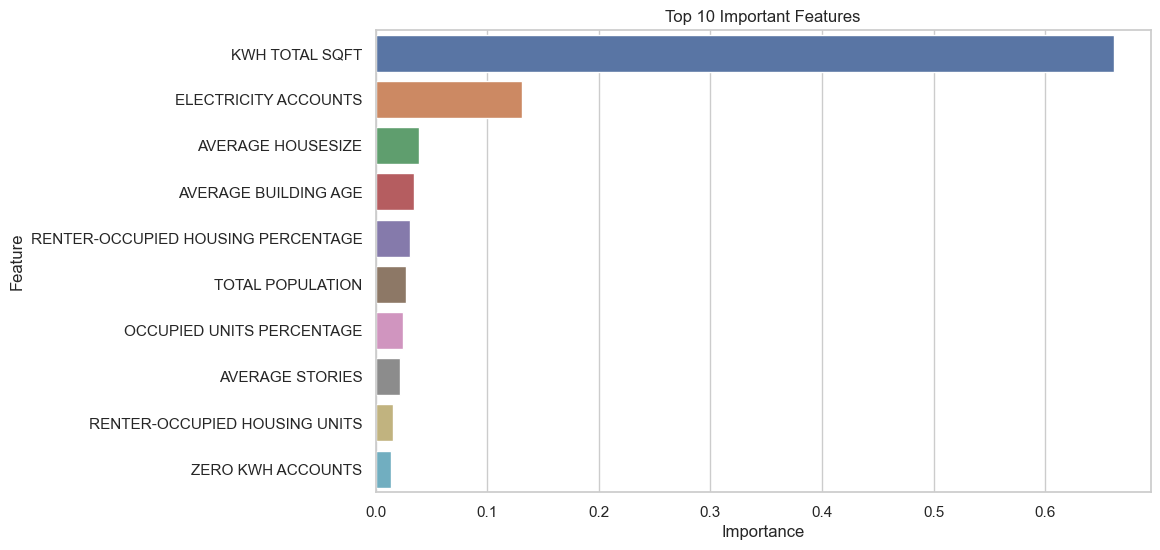

In [115]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=None)
model.fit(X, y['TOTAL KWH'])

feature_importances = model.feature_importances_

feature_importance_df_KWH = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df_KWH = feature_importance_df_KWH.sort_values(by='Importance', ascending=False)

top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_KWH.head(top_n))
plt.title('Top {} Important Features'.format(top_n))
plt.show()

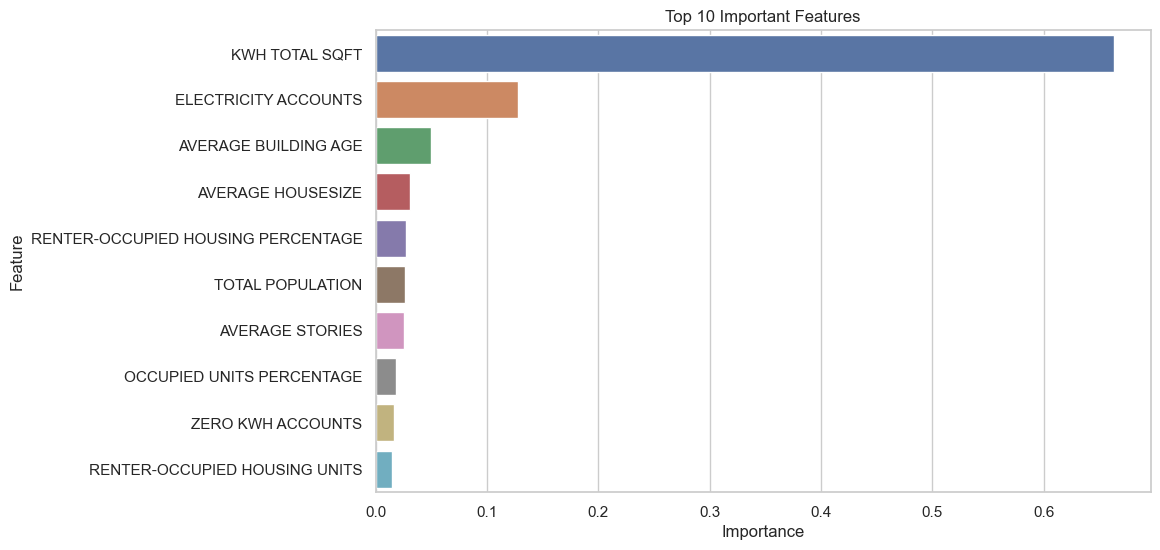

In [116]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=None)
model.fit(X, y['TOTAL THERMS'])

feature_importances = model.feature_importances_

feature_importance_df_therms = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

feature_importance_df_therms = feature_importance_df_therms.sort_values(by='Importance', ascending=False)

top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_therms.head(top_n))
plt.title('Top {} Important Features'.format(top_n))
plt.show()

Considering the above two models, we reduce the complexity of the model by eliminating the least important features from the two feature importance evaluation, i.e. 'ZERO KWH ACCOUNTS' and 'RENTER-OCCUPIED HOUSING UNITS'.

In [117]:
X_tree= df_3.drop(['TOTAL KWH', 'TOTAL THERMS', 'ZERO KWH ACCOUNTS', 'RENTER-OCCUPIED HOUSING UNITS'], axis=1)
y_tree = df_3[['TOTAL KWH', 'TOTAL THERMS']]

X_train, X_test, y_train, y_test = train_test_split(X_tree, y_tree, test_size=0.25, random_state=42)

### Decision Tree

In [118]:
base_regressor = DecisionTreeRegressor()

multioutput_regressor_dt = MultiOutputRegressor(base_regressor)

multioutput_regressor_dt.fit(X_train, y_train)

y_test_pred_dt = multioutput_regressor_dt.predict(X_test)
y_train_pred_dt = multioutput_regressor_dt.predict(X_train)

#KWH
r2_train_kwh_dt = r2_score(y_train['TOTAL KWH'], y_train_pred_dt[:, 0])
mae_train_kwh_dt = mean_absolute_error(y_train['TOTAL KWH'], y_train_pred_dt[:, 0])
mse_train_kwh_dt = mean_squared_error(y_train['TOTAL KWH'], y_train_pred_dt[:, 0])

r2_test_kwh_dt = r2_score(y_test['TOTAL KWH'], y_test_pred_dt[:, 0])
mae_test_kwh_dt = mean_absolute_error(y_test['TOTAL KWH'], y_test_pred_dt[:, 0])
mse_test_kwh_dt = mean_squared_error(y_test['TOTAL KWH'], y_test_pred_dt[:, 0])

#THERMS
r2_train_therms_dt = r2_score(y_train['TOTAL THERMS'], y_train_pred_dt[:, 1])
mae_train_therms_dt = mean_absolute_error(y_train['TOTAL THERMS'], y_train_pred_dt[:, 1])
mse_train_therms_dt = mean_squared_error(y_train['TOTAL THERMS'], y_train_pred_dt[:, 1])

r2_test_therms_dt = r2_score(y_test['TOTAL THERMS'], y_test_pred_dt[:, 1])
mae_test_therms_dt = mean_absolute_error(y_test['TOTAL THERMS'], y_test_pred_dt[:, 1])
mse_test_therms_dt = mean_squared_error(y_test['TOTAL THERMS'], y_test_pred_dt[:, 1])

results_dt = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'KWH Train Set': [r2_train_kwh_dt, mae_train_kwh_dt, mse_train_kwh_dt], 
    'THERMS Train Set':[r2_train_therms_dt, mae_train_therms_dt, mse_train_therms_dt],
    'KWH Test Set': [r2_test_kwh_dt, mae_test_kwh_dt, mse_test_kwh_dt], 
    'THERMS Test Set': [r2_test_therms_dt, mae_test_therms_dt, mse_test_therms_dt],
    'Mean Train Set':[np.mean([r2_train_kwh_dt,r2_train_therms_dt]), np.mean([mae_train_kwh_dt,mae_train_therms_dt]), np.mean([mse_train_kwh_dt,mse_train_therms_dt])],
    'Mean Test Set': [np.mean([r2_test_kwh_dt,r2_test_therms_dt]), np.mean([mae_test_kwh_dt,mae_test_therms_dt]), np.mean([mse_test_kwh_dt,mse_test_therms_dt])]
})

results_dt = results_dt.round(4)
results_dt

,Metric,KWH Train Set,THERMS Train Set,KWH Test Set,THERMS Test Set,Mean Train Set,Mean Test Set
0,R-squared,1.0,1.0,0.5331,0.5501,1.0,0.5416
1,MAE,0.0,0.0,0.4800,0.4678,0.0,0.4739
2,MSE,0.0,0.0,0.4639,0.4419,0.0,0.4529


The analysis unveiled a challenge characterized by High Variance, indicating a risk of overfitting. Additionally, a reduction in the R-squared score was observed compared to the Linear Regressor, to overcome this issue of High variance we decided to go with Bagged Regressor.

### Bagged Regression

In [120]:
bag_reg = BaggingRegressor(base_estimator=tree.DecisionTreeRegressor())

multioutput_regressor_bg = MultiOutputRegressor(bag_reg)

multioutput_regressor_bg.fit(X_train, y_train)

y_test_pred_bg = multioutput_regressor_bg.predict(X_test)
y_train_pred_bg = multioutput_regressor_bg.predict(X_train)

#KWH
r2_train_kwh_bg = r2_score(y_train['TOTAL KWH'], y_train_pred_bg[:, 0])
mae_train_kwh_bg = mean_absolute_error(y_train['TOTAL KWH'], y_train_pred_bg[:, 0])
mse_train_kwh_bg = mean_squared_error(y_train['TOTAL KWH'], y_train_pred_bg[:, 0])

r2_test_kwh_bg = r2_score(y_test['TOTAL KWH'], y_test_pred_bg[:, 0])
mae_test_kwh_bg = mean_absolute_error(y_test['TOTAL KWH'], y_test_pred_bg[:, 0])
mse_test_kwh_bg = mean_squared_error(y_test['TOTAL KWH'], y_test_pred_bg[:, 0])

#THERMS
r2_train_therms_bg = r2_score(y_train['TOTAL THERMS'], y_train_pred_bg[:, 1])
mae_train_therms_bg = mean_absolute_error(y_train['TOTAL THERMS'], y_train_pred_bg[:, 1])
mse_train_therms_bg = mean_squared_error(y_train['TOTAL THERMS'], y_train_pred_bg[:, 1])

r2_test_therms_bg = r2_score(y_test['TOTAL THERMS'], y_test_pred_bg[:, 1])
mae_test_therms_bg = mean_absolute_error(y_test['TOTAL THERMS'], y_test_pred_bg[:, 1])
mse_test_therms_bg = mean_squared_error(y_test['TOTAL THERMS'], y_test_pred_bg[:, 1])

results_bg = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'KWH Train Set': [r2_train_kwh_bg, mae_train_kwh_bg, mse_train_kwh_bg], 
    'THERMS Train Set':[r2_train_therms_bg, mae_train_therms_bg, mse_train_therms_bg],
    'KWH Test Set': [r2_test_kwh_bg, mae_test_kwh_bg, mse_test_kwh_bg], 
    'THERMS Test Set': [r2_test_therms_bg, mae_test_therms_bg, mse_test_therms_bg],
    'Mean Train Set':[np.mean([r2_train_kwh_bg,r2_train_therms_bg]), np.mean([mae_train_kwh_bg,mae_train_therms_bg]), np.mean([mse_train_kwh_bg,mse_train_therms_bg])],
    'Mean Test Set': [np.mean([r2_test_kwh_bg,r2_test_therms_bg]), np.mean([mae_test_kwh_bg,mae_test_therms_bg]), np.mean([mse_test_kwh_bg,mse_test_therms_bg])]
})

results_bg = results_bg.round(4)
results_bg

C:\software\anaconda\New folder\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\software\anaconda\New folder\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


,Metric,KWH Train Set,THERMS Train Set,KWH Test Set,THERMS Test Set,Mean Train Set,Mean Test Set
0,R-squared,0.9548,0.9570,0.7439,0.7534,0.9559,0.7487
1,MAE,0.1425,0.1371,0.3623,0.3474,0.1398,0.3549
2,MSE,0.0453,0.0433,0.2545,0.2422,0.0443,0.2483


While the Bagged Regressor results haven't entirely resolved the challenge of high variance, they notably improved the model's R-squared score. In the pursuit of a solution, we've opted to fine-tune hyperparameters to address the remaining variance issue.

### Bagged Regression with Tuning

In [121]:
param_grid = {'estimator__n_estimators': [50, 100, 200],
              'estimator__base_estimator__max_depth': [None, 10, 20],
              'estimator__base_estimator__min_samples_split': [2, 5, 10],
              'estimator__base_estimator__min_samples_leaf': [1, 2, 4],
              'estimator__max_samples': [0.5, 0.7, 1.0]
                                            }
base_estimator = DecisionTreeRegressor()

bag_reg = BaggingRegressor(base_estimator=base_estimator)

multioutput_regressor_bgt = MultiOutputRegressor(bag_reg)

scorer_bgt = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=multioutput_regressor_bgt,param_grid=param_grid, scoring=scorer_bgt, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_bgt=grid_search.best_params_

print("Best Parameters:", grid_search.best_params_)

best_estimator_bgt = grid_search.best_estimator_

best_estimator_bgt.fit(X_train, y_train)

y_test_pred_bgt = best_estimator_bgt.predict(X_test)
y_train_pred_bgt = best_estimator_bgt.predict(X_train)

#KWH
r2_train_kwh_bgt = r2_score(y_train['TOTAL KWH'], y_train_pred_bgt[:, 0])
mae_train_kwh_bgt = mean_absolute_error(y_train['TOTAL KWH'], y_train_pred_bgt[:, 0])
mse_train_kwh_bgt = mean_squared_error(y_train['TOTAL KWH'], y_train_pred_bgt[:, 0])

r2_test_kwh_bgt = r2_score(y_test['TOTAL KWH'], y_test_pred_bgt[:, 0])
mae_test_kwh_bgt = mean_absolute_error(y_test['TOTAL KWH'], y_test_pred_bgt[:, 0])
mse_test_kwh_bgt = mean_squared_error(y_test['TOTAL KWH'], y_test_pred_bgt[:, 0])

#THERMS
r2_train_therms_bgt = r2_score(y_train['TOTAL THERMS'], y_train_pred_bgt[:, 1])
mae_train_therms_bgt = mean_absolute_error(y_train['TOTAL THERMS'], y_train_pred_bgt[:, 1])
mse_train_therms_bgt = mean_squared_error(y_train['TOTAL THERMS'], y_train_pred_bgt[:, 1])

r2_test_therms_bgt = r2_score(y_test['TOTAL THERMS'], y_test_pred_bgt[:, 1])
mae_test_therms_bgt = mean_absolute_error(y_test['TOTAL THERMS'], y_test_pred_bgt[:, 1])
mse_test_therms_bgt = mean_squared_error(y_test['TOTAL THERMS'], y_test_pred_bgt[:, 1])

results_bgt = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'KWH Train Set': [r2_train_kwh_bgt, mae_train_kwh_bgt, mse_train_kwh_bgt], 
    'THERMS Train Set':[r2_train_therms_bgt, mae_train_therms_bgt, mse_train_therms_bgt],
    'KWH Test Set': [r2_test_kwh_bgt, mae_test_kwh_bgt, mse_test_kwh_bgt], 
    'THERMS Test Set': [r2_test_therms_bgt, mae_test_therms_bgt, mse_test_therms_bgt],
    'Mean Train Set':[np.mean([r2_train_kwh_bgt,r2_train_therms_bgt]), np.mean([mae_train_kwh_bgt,mae_train_therms_bgt]), np.mean([mse_train_kwh_bgt,mse_train_therms_bgt])],
    'Mean Test Set': [np.mean([r2_test_kwh_bgt,r2_test_therms_bgt]), np.mean([mae_test_kwh_bgt,mae_test_therms_bgt]), np.mean([mse_test_kwh_bgt,mse_test_therms_bgt])]
})

results_bgt = results_bgt.round(4)
results_bgt

C:\software\anaconda\New folder\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\software\anaconda\New folder\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters: {'estimator__base_estimator__max_depth': None, 'estimator__base_estimator__min_samples_leaf': 4, 'estimator__base_estimator__min_samples_split': 10, 'estimator__max_samples': 0.5, 'estimator__n_estimators': 200}


C:\software\anaconda\New folder\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\software\anaconda\New folder\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


,Metric,KWH Train Set,THERMS Train Set,KWH Test Set,THERMS Test Set,Mean Train Set,Mean Test Set
0,R-squared,0.8575,0.8692,0.7790,0.7793,0.8634,0.7791
1,MAE,0.2627,0.2519,0.3360,0.3280,0.2573,0.3320
2,MSE,0.1428,0.1315,0.2196,0.2167,0.1372,0.2182


Through hyperparameter tuning, we refined our model, successfully alleviating the issue of high variance. This enhanced robustness, contributing to improved overall performance.

The results indicate that the Bagged Decision Tree outperformed the Polynomial Regressor, achieving a much better R-squared score for the Test Set and a significantly improved R-squared score for the Train Set.

### Random Forest

Applying a similar methodology to the Bagged Decision Tree Regressor, we implemented the Random Forest Regressor, incorporating an extra degree of unpredictability into every decision-making split.

In [122]:
base_regressor = RandomForestRegressor()

multioutput_regressor_rf = MultiOutputRegressor(base_regressor)

multioutput_regressor_rf.fit(X_train, y_train)

y_test_pred_rf = multioutput_regressor_rf.predict(X_test)
y_train_pred_rf = multioutput_regressor_rf.predict(X_train)

#KWH
r2_train_kwh_rf = r2_score(y_train['TOTAL KWH'], y_train_pred_rf[:, 0])
mae_train_kwh_rf = mean_absolute_error(y_train['TOTAL KWH'], y_train_pred_rf[:, 0])
mse_train_kwh_rf = mean_squared_error(y_train['TOTAL KWH'], y_train_pred_rf[:, 0])

r2_test_kwh_rf = r2_score(y_test['TOTAL KWH'], y_test_pred_rf[:, 0])
mae_test_kwh_rf = mean_absolute_error(y_test['TOTAL KWH'], y_test_pred_rf[:, 0])
mse_test_kwh_rf = mean_squared_error(y_test['TOTAL KWH'], y_test_pred_rf[:, 0])

#THERMS
r2_train_therms_rf = r2_score(y_train['TOTAL THERMS'], y_train_pred_rf[:, 1])
mae_train_therms_rf = mean_absolute_error(y_train['TOTAL THERMS'], y_train_pred_rf[:, 1])
mse_train_therms_rf = mean_squared_error(y_train['TOTAL THERMS'], y_train_pred_rf[:, 1])

r2_test_therms_rf = r2_score(y_test['TOTAL THERMS'], y_test_pred_rf[:, 1])
mae_test_therms_rf = mean_absolute_error(y_test['TOTAL THERMS'], y_test_pred_rf[:, 1])
mse_test_therms_rf = mean_squared_error(y_test['TOTAL THERMS'], y_test_pred_rf[:, 1])

results_rf = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'KWH Train Set': [r2_train_kwh_rf, mae_train_kwh_rf, mse_train_kwh_rf], 
    'THERMS Train Set':[r2_train_therms_rf, mae_train_therms_rf, mse_train_therms_rf],
    'KWH Test Set': [r2_test_kwh_rf, mae_test_kwh_rf, mse_test_kwh_rf], 
    'THERMS Test Set': [r2_test_therms_rf, mae_test_therms_rf, mse_test_therms_rf],
    'Mean Train Set':[np.mean([r2_train_kwh_rf,r2_train_therms_rf]), np.mean([mae_train_kwh_rf,mae_train_therms_rf]), np.mean([mse_train_kwh_rf,mse_train_therms_rf])],
    'Mean Test Set': [np.mean([r2_test_kwh_rf,r2_test_therms_rf]), np.mean([mae_test_kwh_rf,mae_test_therms_rf]), np.mean([mse_test_kwh_rf,mse_test_therms_rf])]
})

results_rf = results_rf.round(4)
results_rf

,Metric,KWH Train Set,THERMS Train Set,KWH Test Set,THERMS Test Set,Mean Train Set,Mean Test Set
0,R-squared,0.9664,0.9700,0.7721,0.7744,0.9682,0.7732
1,MAE,0.1294,0.1228,0.3418,0.3309,0.1261,0.3364
2,MSE,0.0337,0.0302,0.2264,0.2216,0.0319,0.2240


The results show that the Random Forest Regressor faced a high variance problem, similar to the Bagged Regressor before hyperparameter adjustment. In order to overcome the stated issue, we carried out hyperparameter tuning.

### Random Forest With Tuning

In [123]:
param_grid = {
    'estimator__n_estimators': [50, 100, 150],
    'estimator__max_depth': [None, 10, 20],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
    'estimator__max_leaf_nodes': [10, 20, 50, 100]
}
base_regressor = RandomForestRegressor()

multioutput_regressor_rft = MultiOutputRegressor(base_regressor)

grid_search = GridSearchCV(estimator=multioutput_regressor_rft,param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params__rft=grid_search.best_params_

print("Best Parameters:", grid_search.best_params_)

best_estimator_rft = grid_search.best_estimator_

best_estimator_rft.fit(X_train, y_train)

y_test_pred_rft = best_estimator_rft.predict(X_test)
y_train_pred_rft = best_estimator_rft.predict(X_train)

#KWH
r2_train_kwh_rft = r2_score(y_train['TOTAL KWH'], y_train_pred_rft[:, 0])
mae_train_kwh_rft = mean_absolute_error(y_train['TOTAL KWH'], y_train_pred_rft[:, 0])
mse_train_kwh_rft = mean_squared_error(y_train['TOTAL KWH'], y_train_pred_rft[:, 0])

r2_test_kwh_rft = r2_score(y_test['TOTAL KWH'], y_test_pred_rft[:, 0])
mae_test_kwh_rft = mean_absolute_error(y_test['TOTAL KWH'], y_test_pred_rft[:, 0])
mse_test_kwh_rft = mean_squared_error(y_test['TOTAL KWH'], y_test_pred_rft[:, 0])

#THERMS
r2_train_therms_rft = r2_score(y_train['TOTAL THERMS'], y_train_pred_rft[:, 1])
mae_train_therms_rft = mean_absolute_error(y_train['TOTAL THERMS'], y_train_pred_rft[:, 1])
mse_train_therms_rft = mean_squared_error(y_train['TOTAL THERMS'], y_train_pred_rft[:, 1])

r2_test_therms_rft = r2_score(y_test['TOTAL THERMS'], y_test_pred_rft[:, 1])
mae_test_therms_rft = mean_absolute_error(y_test['TOTAL THERMS'], y_test_pred_rft[:, 1])
mse_test_therms_rft = mean_squared_error(y_test['TOTAL THERMS'], y_test_pred_rft[:, 1])

results_rft = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'KWH Train Set': [r2_train_kwh_rft, mae_train_kwh_rft, mse_train_kwh_rft], 
    'THERMS Train Set':[r2_train_therms_rft, mae_train_therms_rft, mse_train_therms_rft],
    'KWH Test Set': [r2_test_kwh_rft, mae_test_kwh_rft, mse_test_kwh_rft], 
    'THERMS Test Set': [r2_test_therms_rft, mae_test_therms_rft, mse_test_therms_rft],
    'Mean Train Set':[np.mean([r2_train_kwh_rft,r2_train_therms_rft]), np.mean([mae_train_kwh_rft,mae_train_therms_rft]), np.mean([mse_train_kwh_rft,mse_train_therms_rft])],
    'Mean Test Set': [np.mean([r2_test_kwh_rft,r2_test_therms_rft]), np.mean([mae_test_kwh_rft,mae_test_therms_rft]), np.mean([mse_test_kwh_rft,mse_test_therms_rft])]
})

results_rft = results_rft.round(4)
results_rft

Best Parameters: {'estimator__max_depth': 10, 'estimator__max_leaf_nodes': 100, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 100}


,Metric,KWH Train Set,THERMS Train Set,KWH Test Set,THERMS Test Set,Mean Train Set,Mean Test Set
0,R-squared,0.7975,0.8109,0.7716,0.7686,0.8042,0.7701
1,MAE,0.3291,0.3203,0.3446,0.3412,0.3247,0.3429
2,MSE,0.2030,0.1903,0.2270,0.2273,0.1966,0.2271


The results that are displayed show the Random Forest Regressor performance following hyperparameter adjustment. While there was no significant difference in the R-squared score between this model and the Bagged Regressor, it produced more consistent results by achieving a better equilibrium between the test and train sets.

### Gradient Boosting

To broaden our approach, we embraced boosting techniques for their robust predictive performance.These methods not only demonstrate strong capabilities but also maintain a commendable balance between the test and train datasets, enhancing overall model effectiveness.

In [124]:
base_regressor = GradientBoostingRegressor()

multioutput_regressor_gb = MultiOutputRegressor(base_regressor)

multioutput_regressor_gb.fit(X_train, y_train)

y_test_pred_gb = multioutput_regressor_gb.predict(X_test)
y_train_pred_gb = multioutput_regressor_gb.predict(X_train)

#KWH
r2_train_kwh_gb = r2_score(y_train['TOTAL KWH'], y_train_pred_gb[:, 0])
mae_train_kwh_gb = mean_absolute_error(y_train['TOTAL KWH'], y_train_pred_gb[:, 0])
mse_train_kwh_gb = mean_squared_error(y_train['TOTAL KWH'], y_train_pred_gb[:, 0])

r2_test_kwh_gb = r2_score(y_test['TOTAL KWH'], y_test_pred_gb[:, 0])
mae_test_kwh_gb = mean_absolute_error(y_test['TOTAL KWH'], y_test_pred_gb[:, 0])
mse_test_kwh_gb = mean_squared_error(y_test['TOTAL KWH'], y_test_pred_gb[:, 0])

#THERMS
r2_train_therms_gb = r2_score(y_train['TOTAL THERMS'], y_train_pred_gb[:, 1])
mae_train_therms_gb = mean_absolute_error(y_train['TOTAL THERMS'], y_train_pred_gb[:, 1])
mse_train_therms_gb = mean_squared_error(y_train['TOTAL THERMS'], y_train_pred_gb[:, 1])

r2_test_therms_gb = r2_score(y_test['TOTAL THERMS'], y_test_pred_gb[:, 1])
mae_test_therms_gb = mean_absolute_error(y_test['TOTAL THERMS'], y_test_pred_gb[:, 1])
mse_test_therms_gb = mean_squared_error(y_test['TOTAL THERMS'], y_test_pred_gb[:, 1])

results_gb = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'KWH Train Set': [r2_train_kwh_gb, mae_train_kwh_gb, mse_train_kwh_gb], 
    'THERMS Train Set':[r2_train_therms_gb, mae_train_therms_gb, mse_train_therms_gb],
    'KWH Test Set': [r2_test_kwh_gb, mae_test_kwh_gb, mse_test_kwh_gb], 
    'THERMS Test Set': [r2_test_therms_gb, mae_test_therms_gb, mse_test_therms_gb],
    'Mean Train Set':[np.mean([r2_train_kwh_gb,r2_train_therms_gb]), np.mean([mae_train_kwh_gb,mae_train_therms_gb]), np.mean([mse_train_kwh_gb,mse_train_therms_gb])],
    'Mean Test Set': [np.mean([r2_test_kwh_gb,r2_test_therms_gb]), np.mean([mae_test_kwh_gb,mae_test_therms_gb]), np.mean([mse_test_kwh_gb,mse_test_therms_gb])]
})

results_gb = results_gb.round(4)
results_gb

,Metric,KWH Train Set,THERMS Train Set,KWH Test Set,THERMS Test Set,Mean Train Set,Mean Test Set
0,R-squared,0.7833,0.7972,0.7752,0.7764,0.7902,0.7758
1,MAE,0.3325,0.3246,0.3366,0.3340,0.3285,0.3353
2,MSE,0.2172,0.2040,0.2234,0.2196,0.2106,0.2215


### Gradient Boosting with Tuning

In [125]:
param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__learning_rate': [0.01, 0.1, 0.2],
    'estimator__max_depth': [3, 4, 5],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4],
}
base_regressor = GradientBoostingRegressor()

multioutput_regressor_gbt = MultiOutputRegressor(base_regressor)

grid_search = GridSearchCV(estimator=multioutput_regressor_gbt,param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_gbt= grid_search.best_params_

print("Best Parameters:", grid_search.best_params_)

best_estimator_gbt = grid_search.best_estimator_

best_estimator_gbt.fit(X_train, y_train)

y_test_pred_gbt = best_estimator_gbt.predict(X_test)
y_train_pred_gbt = best_estimator_gbt.predict(X_train)

#KWH
r2_train_kwh_gbt = r2_score(y_train['TOTAL KWH'], y_train_pred_gbt[:, 0])
mae_train_kwh_gbt = mean_absolute_error(y_train['TOTAL KWH'], y_train_pred_gbt[:, 0])
mse_train_kwh_gbt = mean_squared_error(y_train['TOTAL KWH'], y_train_pred_gbt[:, 0])

r2_test_kwh_gbt = r2_score(y_test['TOTAL KWH'], y_test_pred_gbt[:, 0])
mae_test_kwh_gbt = mean_absolute_error(y_test['TOTAL KWH'], y_test_pred_gbt[:, 0])
mse_test_kwh_gbt = mean_squared_error(y_test['TOTAL KWH'], y_test_pred_gbt[:, 0])

#THERMS
r2_train_therms_gbt = r2_score(y_train['TOTAL THERMS'], y_train_pred_gbt[:, 1])
mae_train_therms_gbt = mean_absolute_error(y_train['TOTAL THERMS'], y_train_pred_gbt[:, 1])
mse_train_therms_gbt = mean_squared_error(y_train['TOTAL THERMS'], y_train_pred_gbt[:, 1])

r2_test_therms_gbt = r2_score(y_test['TOTAL THERMS'], y_test_pred_gbt[:, 1])
mae_test_therms_gbt = mean_absolute_error(y_test['TOTAL THERMS'], y_test_pred_gbt[:, 1])
mse_test_therms_gbt = mean_squared_error(y_test['TOTAL THERMS'], y_test_pred_gbt[:, 1])

results_gbt = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'KWH Train Set': [r2_train_kwh_gbt, mae_train_kwh_gbt, mse_train_kwh_gbt], 
    'THERMS Train Set':[r2_train_therms_gbt, mae_train_therms_gbt, mse_train_therms_gbt],
    'KWH Test Set': [r2_test_kwh_gbt, mae_test_kwh_gbt, mse_test_kwh_gbt], 
    'THERMS Test Set': [r2_test_therms_gbt, mae_test_therms_gbt, mse_test_therms_gbt],
    'Mean Train Set':[np.mean([r2_train_kwh_gbt,r2_train_therms_gbt]), np.mean([mae_train_kwh_gbt,mae_train_therms_gbt]), np.mean([mse_train_kwh_gbt,mse_train_therms_gbt])],
    'Mean Test Set': [np.mean([r2_test_kwh_gbt,r2_test_therms_gbt]), np.mean([mae_test_kwh_gbt,mae_test_therms_gbt]), np.mean([mse_test_kwh_gbt,mse_test_therms_gbt])]
})

results_gbt = results_gbt.round(4)
results_gbt

Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__min_samples_leaf': 4, 'estimator__min_samples_split': 10, 'estimator__n_estimators': 100}


,Metric,KWH Train Set,THERMS Train Set,KWH Test Set,THERMS Test Set,Mean Train Set,Mean Test Set
0,R-squared,0.8204,0.8339,0.7778,0.7810,0.8272,0.7794
1,MAE,0.3083,0.2978,0.3351,0.3275,0.3030,0.3313
2,MSE,0.1800,0.1671,0.2208,0.2151,0.1735,0.2180


In contrast to the Bagged Regressor, the Gradient Boosting Regressor exhibited an improved R-squared score for the test set, along with relatively lower MAE and MSE scores. Additionally, it maintained a better balance between the test and train sets, ensuring consistent predictability.

### XGBoost

In [126]:
base_regressor = XGBRegressor()

multioutput_regressor_xg = MultiOutputRegressor(base_regressor)

multioutput_regressor_xg.fit(X_train, y_train)

y_test_pred_xg = multioutput_regressor_xg.predict(X_test)
y_train_pred_xg = multioutput_regressor_xg.predict(X_train)

#KWH
r2_train_kwh_xg = r2_score(y_train['TOTAL KWH'], y_train_pred_xg[:, 0])
mae_train_kwh_xg = mean_absolute_error(y_train['TOTAL KWH'], y_train_pred_xg[:, 0])
mse_train_kwh_xg = mean_squared_error(y_train['TOTAL KWH'], y_train_pred_xg[:, 0])

r2_test_kwh_xg = r2_score(y_test['TOTAL KWH'], y_test_pred_xg[:, 0])
mae_test_kwh_xg = mean_absolute_error(y_test['TOTAL KWH'], y_test_pred_xg[:, 0])
mse_test_kwh_xg = mean_squared_error(y_test['TOTAL KWH'], y_test_pred_xg[:, 0])

#THERMS
r2_train_therms_xg= r2_score(y_train['TOTAL THERMS'], y_train_pred_xg[:, 1])
mae_train_therms_xg = mean_absolute_error(y_train['TOTAL THERMS'], y_train_pred_xg[:, 1])
mse_train_therms_xg = mean_squared_error(y_train['TOTAL THERMS'], y_train_pred_xg[:, 1])

r2_test_therms_xg = r2_score(y_test['TOTAL THERMS'], y_test_pred_xg[:, 1])
mae_test_therms_xg = mean_absolute_error(y_test['TOTAL THERMS'], y_test_pred_xg[:, 1])
mse_test_therms_xg = mean_squared_error(y_test['TOTAL THERMS'], y_test_pred_xg[:, 1])

results_xg = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'KWH Train Set': [r2_train_kwh_xg, mae_train_kwh_xg, mse_train_kwh_xg], 
    'THERMS Train Set':[r2_train_therms_xg, mae_train_therms_xg, mse_train_therms_xg],
    'KWH Test Set': [r2_test_kwh_xg, mae_test_kwh_xg, mse_test_kwh_xg], 
    'THERMS Test Set': [r2_test_therms_xg, mae_test_therms_xg, mse_test_therms_xg],
    'Mean Train Set':[np.mean([r2_train_kwh_xg,r2_train_therms_xg]), np.mean([mae_train_kwh_xg,mae_train_therms_xg]), np.mean([mse_train_kwh_xg,mse_train_therms_xg])],
    'Mean Test Set': [np.mean([r2_test_kwh_xg,r2_test_therms_xg]), np.mean([mae_test_kwh_xg,mae_test_therms_xg]), np.mean([mse_test_kwh_xg,mse_test_therms_xg])]
})

results_xg = results_xg.round(4)
results_xg

,Metric,KWH Train Set,THERMS Train Set,KWH Test Set,THERMS Test Set,Mean Train Set,Mean Test Set
0,R-squared,0.9025,0.9098,0.7623,0.7634,0.9061,0.7628
1,MAE,0.2326,0.2237,0.3458,0.3383,0.2281,0.3420
2,MSE,0.0977,0.0908,0.2362,0.2323,0.0943,0.2343


### XGBoost with Tuning

In [127]:
param_grid = {
    'estimator__n_estimators': [50, 100, 150],  
    'estimator__max_depth': [3, 5, 7],  
    'estimator__learning_rate': [0.01, 0.1, 0.2],  
    'estimator__subsample': [0.8, 1.0],
}
base_regressor = XGBRegressor()

multioutput_regressor_xgt = MultiOutputRegressor(base_regressor)

grid_search = GridSearchCV(estimator=multioutput_regressor_xgt,param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params_xgt= grid_search.best_params_

print("Best Parameters:", grid_search.best_params_)

best_estimator_xgt = grid_search.best_estimator_

best_estimator_xgt.fit(X_train, y_train)

y_test_pred_xgt = best_estimator_xgt.predict(X_test)
y_train_pred_xgt = best_estimator_xgt.predict(X_train)

#KWH
r2_train_kwh_xgt = r2_score(y_train['TOTAL KWH'], y_train_pred_xgt[:, 0])
mae_train_kwh_xgt = mean_absolute_error(y_train['TOTAL KWH'], y_train_pred_xgt[:, 0])
mse_train_kwh_xgt = mean_squared_error(y_train['TOTAL KWH'], y_train_pred_xgt[:, 0])

r2_test_kwh_xgt = r2_score(y_test['TOTAL KWH'], y_test_pred_xgt[:, 0])
mae_test_kwh_xgt = mean_absolute_error(y_test['TOTAL KWH'], y_test_pred_xgt[:, 0])
mse_test_kwh_xgt = mean_squared_error(y_test['TOTAL KWH'], y_test_pred_xgt[:, 0])

#THERMS
r2_train_therms_xgt = r2_score(y_train['TOTAL THERMS'], y_train_pred_xgt[:, 1])
mae_train_therms_xgt = mean_absolute_error(y_train['TOTAL THERMS'], y_train_pred_xgt[:, 1])
mse_train_therms_xgt = mean_squared_error(y_train['TOTAL THERMS'], y_train_pred_xgt[:, 1])

r2_test_therms_xgt = r2_score(y_test['TOTAL THERMS'], y_test_pred_xgt[:, 1])
mae_test_therms_xgt = mean_absolute_error(y_test['TOTAL THERMS'], y_test_pred_xgt[:, 1])
mse_test_therms_xgt = mean_squared_error(y_test['TOTAL THERMS'], y_test_pred_xgt[:, 1])

results_xgt = pd.DataFrame({
    'Metric': ['R-squared', 'MAE', 'MSE'],
    'KWH Train Set': [r2_train_kwh_xgt, mae_train_kwh_xgt, mse_train_kwh_xgt], 
    'THERMS Train Set':[r2_train_therms_xgt, mae_train_therms_xgt, mse_train_therms_xgt],
    'KWH Test Set': [r2_test_kwh_xgt, mae_test_kwh_xgt, mse_test_kwh_xgt], 
    'THERMS Test Set': [r2_test_therms_xgt, mae_test_therms_xgt, mse_test_therms_xgt],
    'Mean Train Set':[np.mean([r2_train_kwh_xgt,r2_train_therms_xgt]), np.mean([mae_train_kwh_xgt,mae_train_therms_xgt]), np.mean([mse_train_kwh_xgt,mse_train_therms_xgt])],
    'Mean Test Set': [np.mean([r2_test_kwh_xgt,r2_test_therms_xgt]), np.mean([mae_test_kwh_xgt,mae_test_therms_xgt]), np.mean([mse_test_kwh_xgt,mse_test_therms_xgt])]
})

results_xgt = results_xgt.round(4)
results_xgt

Best Parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 100, 'estimator__subsample': 1.0}


,Metric,KWH Train Set,THERMS Train Set,KWH Test Set,THERMS Test Set,Mean Train Set,Mean Test Set
0,R-squared,0.8197,0.8371,0.7792,0.7829,0.8284,0.7810
1,MAE,0.3091,0.2959,0.3341,0.3268,0.3025,0.3305
2,MSE,0.1807,0.1639,0.2194,0.2133,0.1723,0.2163


Initially, the XGBoost Regressor displayed an imbalance in the test and train R-squared scores (0.90 for train and 0.76 for test). However, hyperparameter tuning effectively mitigated the high variance issue.

Furthermore, in comparison to the Bagged Regressor and Gradient Boosting Regressor, the XGBoost Regressor yielded the highest R-squared scores, reaching 0.7810 for the test set and 0.8284 for the train set.

### Model Evaluation

#### R2 Score

In [128]:
results_hyp = pd.DataFrame({
    'Models': ['Bagged Regressor', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'Train R2 Score':[np.mean([r2_train_kwh_bgt,r2_train_therms_bgt]), np.mean([r2_train_kwh_rft,r2_train_therms_rft]), np.mean([r2_train_kwh_gbt,r2_train_therms_gbt]), np.mean([r2_train_kwh_xgt,r2_train_therms_xgt])],
    'Test R2 Score': [np.mean([r2_test_kwh_bgt,r2_test_therms_bgt]), np.mean([r2_test_kwh_rft,r2_test_therms_rft]), np.mean([r2_test_kwh_gbt,r2_test_therms_gbt]), np.mean([r2_test_kwh_xgt,r2_test_therms_xgt])]
})

results_hyp = results_hyp.round(4)
results_hyp

,Models,Train R2 Score,Test R2 Score
0,Bagged Regressor,0.8634,0.7791
1,Random Forest,0.8042,0.7701
2,Gradient Boosting,0.8272,0.7794
3,XGBoost,0.8284,0.7810


#### MAE and MSE

In [129]:
results_m = pd.DataFrame({
    'Models': ['Bagged Regressor', 'Random Forest', 'Gradient Boosting', 'XGBoost'],
    'Train MSE':[np.mean([mse_train_kwh_bgt,mse_train_therms_bgt]), np.mean([mse_train_kwh_rft,mse_train_therms_rft]), np.mean([mse_train_kwh_gbt,mse_train_therms_gbt]), np.mean([mse_train_kwh_xgt,mse_train_therms_xgt])],
    'Test MSE': [np.mean([mse_test_kwh_bgt,mse_test_therms_bgt]), np.mean([mse_test_kwh_rft,mse_test_therms_rft]), np.mean([mse_test_kwh_gbt,mse_test_therms_gbt]), np.mean([mse_test_kwh_xgt,mse_test_therms_xgt])],
    'Train MAE':[np.mean([mae_train_kwh_bgt,mae_train_therms_bgt]), np.mean([mae_train_kwh_rft,mae_train_therms_rft]), np.mean([mae_train_kwh_gbt,mae_train_therms_gbt]), np.mean([mae_train_kwh_xgt,mae_train_therms_xgt])],
    'Test MAE': [np.mean([mae_test_kwh_bgt,mae_test_therms_bgt]), np.mean([mae_test_kwh_rft,mae_test_therms_rft]), np.mean([mae_test_kwh_gbt,mae_test_therms_gbt]), np.mean([mae_test_kwh_xgt,mae_test_therms_xgt])]
})

results_m = results_m.round(4)
results_m

,Models,Train MSE,Test MSE,Train MAE,Test MAE
0,Bagged Regressor,0.1372,0.2182,0.2573,0.3320
1,Random Forest,0.1966,0.2271,0.3247,0.3429
2,Gradient Boosting,0.1735,0.2180,0.3030,0.3313
3,XGBoost,0.1723,0.2163,0.3025,0.3305


Based on the aforementioned findings, XGBoost demonstrates strong performance across various metrics, including a commendable R2 score of 0.7810, as well as the lowest MAE and MSE values of 0.3025 and 0.3305, respectively. 

Additionally, the model exhibits consistency in performance between the training and test sets, showcasing a well-balanced and robust nature.

In this process we have came accross varies issues like High Variance, Overfitting and reduced in r2 score. We were able to solve this issue of High Variance by tuning our paramters, also implementing the Boosting techniques resulted in better r2 score.

### Conclusion

In the process of predicting the Total Energy consumption of a Single Family community in Chicago, we utilized multi-output regressor models for our Machine Learning. The target variables for this model were 'TOTAL KWH' and 'TOTAL THERMS'. The features included demographic characteristics of the building, the number of accounts in use, and the square footage associated with energy usage. 

Below are the Use Cases of our project in realtime.

- Addressing Energy Sustainability:

Our project makes a substantial contribution to the cause of sustainable urban development by offering accurate predictions of overall energy usage. This is critical in establishing strategies for optimal resource allocation and decreasing the environmental impact of energy consumption.


- Urban Planning and Policy Making:

The insights derived from our machine learning model serve as a valuable resource for urban planning and policymaking. By understanding energy usage patterns in a single-family community in Chicago, we empower city planners to develop infrastructure and policies that promote sustainable urban growth

- Economic Implications:

 Energy consumption  predictions result in cost reductions for both residents and municipal governments. This opens the door to attracting investment in sustainable technology and infrastructure, which will ultimately enhance the community's economic landscape.

- Replicability and scalability:

The scalability and replicability of our model in other metropolitan environments are major strengths. The Chicago community's insights can be extended to similar circumstances, adding to a better understanding of energy consumption patterns and supporting sustainable urban development initiatives around the world.

- Community Engagement and Education:

Community engagement and education are central to our project's impact. By providing information regarding energy consumption, we create awareness among people and encourage the adoption of sustainable behaviors, generating a sense of responsibility and participation in building greener community